In [80]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 

In [81]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
closure  = False
groomed = False

In [84]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [85]:
with open('latest_pkl/pythia_syst_0302.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_all.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_1701.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk.pkl', "rb") as f:
    output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']

/home/aritra/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [86]:



reco_mass = 151
gen_mass = 141
start_mass = 0

# resp_matrix_4d = resp_matrix_4d[:, :, hist.rebin(2), :, :, :]
# input_data = input_data[:,  :, hist.rebin(2), ...]
# fakes = fakes[:,  :, hist.rebin(2), ...]
# misses = misses[:,  :, :, ...]
# hist_bg = hist_bg[:,  :, hist.rebin(2), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.rebin(2), :,: , ...]
# fakes_herwig = fakes_herwig[:,  :, hist.rebin(2), ...]
# misses_herwig = misses_herwig[:,  :, :, ...]



# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :, hist.loc(start_mass):hist.loc(gen_mass), :]
# input_data = input_data[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# fakes = fakes[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# misses = misses[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass) :hist.loc(gen_mass), :]
# input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]





resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass):, :, hist.loc(start_mass):, :]
input_data = input_data[:,  :, hist.loc(start_mass):, ...]
fakes = fakes[:,  :, hist.loc(start_mass):, ...]
misses = misses[:,  :,hist.loc(start_mass) :, ...]
hist_bg = hist_bg[:,  :, hist.loc(start_mass):, ...]
#resp_matrix_pythia = resp_matrix_pythia 
resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):, :,hist.loc(start_mass): , ...]
fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):, ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass) :, :]
# input_data = input_data[:,  :,hist.loc(start_mass) :, ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :, ...]
# misses = misses[:,  :, hist.loc(start_mass):, ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :, ...]




In [87]:
from cycler import cycler

# Set tab20 as the default color cycle
tab20_colors = plt.cm.tab20.colors
plt.rcParams['axes.prop_cycle'] = cycler(color=tab20_colors)

In [88]:
ww_bg = ww16*hist_bg['ww_UL16NanoAODv9', ...].values() + ww16*hist_bg['ww_UL16NanoAODAPVv9', ...].values() + ww17*hist_bg['ww_UL17NanoAODv9', ...].values() + ww18*hist_bg['ww_UL18NanoAODv9', ...].values() ,   # WW
wz_bg = wz16*hist_bg['wz_UL16NanoAODv9', ...].values() + wz16*hist_bg['wz_UL16NanoAODAPVv9', ...].values() + wz17*hist_bg['wz_UL17NanoAODv9', ...].values() + wz18*hist_bg['wz_UL18NanoAODv9', ...].values(),      # WZ
zz_bg = zz16*hist_bg['zz_UL16NanoAODv9', ...].values() + zz16*hist_bg['zz_UL16NanoAODAPVv9', ...].values() + zz17*hist_bg['zz_UL17NanoAODv9', ...].values() + zz18*hist_bg['zz_UL18NanoAODv9', ...].values(),     # zz

input_data.values().shape
reshape_value = input_data.values().shape[1]* input_data.values().shape[2]

ww_bg = ww_bg[0].reshape(reshape_value)
wz_bg = wz_bg[0].reshape(reshape_value)
zz_bg = zz_bg[0].reshape(reshape_value)

In [89]:
ptreco_center = resp_matrix_4d.axes['ptreco'].centers
ptreco_width = resp_matrix_4d.axes['ptreco'].widths
ptreco_edge = resp_matrix_4d.axes['ptreco'].edges

ptgen_center = resp_matrix_4d.axes['ptgen'].centers
ptgen_width = resp_matrix_4d.axes['ptgen'].widths
ptgen_edge = resp_matrix_4d.axes['ptgen'].edges
mreco_center = resp_matrix_4d.axes['mreco'].centers
mreco_edge = resp_matrix_4d.axes['mreco'].edges
mgen_center = resp_matrix_4d.axes['mgen'].centers

mreco_width = resp_matrix_4d.axes['mreco'].widths
mgen_width = resp_matrix_4d.axes['mgen'].widths
mgen_edge = resp_matrix_4d.axes['mgen'].edges

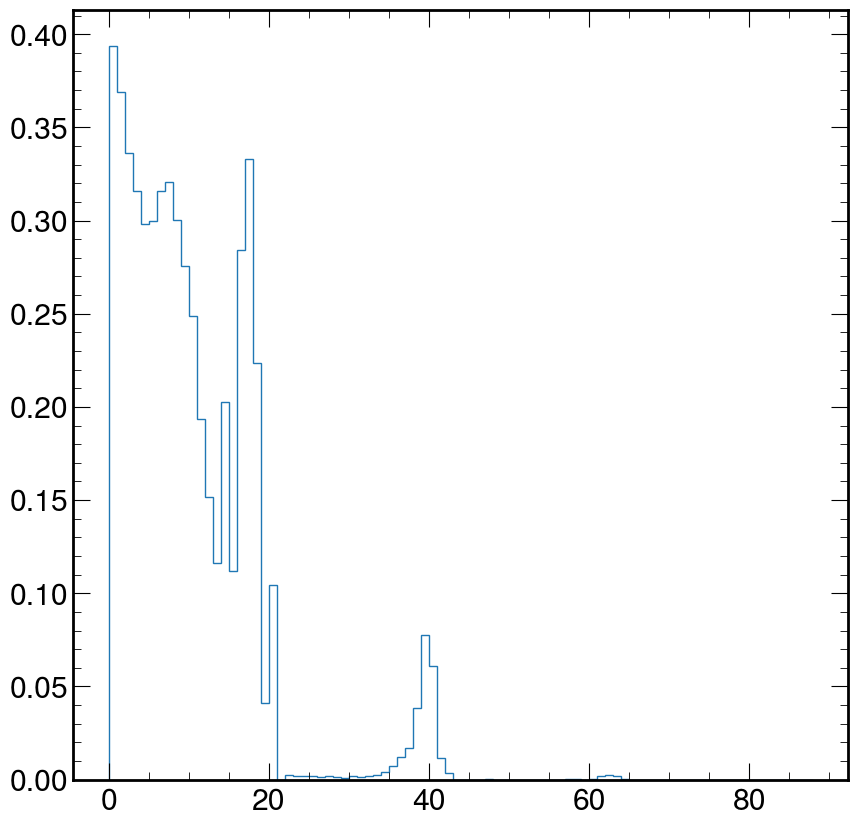

In [90]:
plt.stairs(unfolder.underflow_frac)

In [91]:
correlation_dic = {
    'JES_AbsoluteMPFBias': 1,
    'JES_AbsoluteScale': 1,
    'JES_AbsoluteStat': 0,
    'JES_FlavorQCD': 1,
    'JES_Fragmentation': 1,
    'JES_PileUpDataMC': 0.5,
    'JES_PileUpPtBB': 0.5,
    'JES_PileUpPtEC1': 0.5,
    'JES_PileUpPtEC2': 0.5,
    'JES_PileUpPtHF': 0.5,
    'JES_PileUpPtRef': 0.5,
    'JES_RelativeFSR': 0.5,
    'JES_RelativeJEREC1': 0,
    'JES_RelativeJEREC2': 0,
    'JES_RelativeJERHF': 0.5,
    'JES_RelativePtBB': 0.5,
    'JES_RelativePtEC1': 0,
    'JES_RelativePtEC2': 0,
    'JES_RelativePtHF': 0.5,
    'JES_RelativeBal': 0.5,
    'JES_RelativeSample': 0,
    'JES_RelativeStatEC': 0,
    'JES_RelativeStatFSR': 0,
    'JES_RelativeStatHF': 0,
    'JES_SinglePionECAL': 1,
    'JES_SinglePionHCAL': 1,
    'JES_TimePtEta': 0
}

jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']


non_jes_sys_list = ['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown',
                    'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp',
                    'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp',
                    'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 
                    'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']


non_jes_sys_list_up = [sys for sys in non_jes_sys_list if sys[-2:] == 'Up' ]
non_jes_sys_list_down = [sys for sys in non_jes_sys_list if sys[-4:] == 'Down' ]

jes_sys_list_up = [sys for sys in jes_sys_list if sys[-2:] == 'Up' ]
jes_sys_list_down = [sys for sys in jes_sys_list if sys[-4:] == 'Down' ]

In [92]:
sys_matrix_dic = {}

for sys in jes_sys_list_up:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic[sys+'_corr'] = m_corr
    sys_matrix_dic[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic[sys+'_uncorr_2018'] = m_uncorr_2018
    

for sys in non_jes_sys_list_up:
    sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()



sys_matrix_dic_down = {}
for sys in jes_sys_list_down:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic_down[sys+'_corr'] = m_corr
    sys_matrix_dic_down[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic_down[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic_down[sys+'_uncorr_2018'] = m_uncorr_2018
    

for sys in non_jes_sys_list_down:
    sys_matrix_dic_down[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()


In [93]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolder = Unfolder(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            systematics = sys_matrix_dic,
                            #systematics= None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )
# output_nominal, matrix_plot = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
#                             backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
#                             #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
#                             systematics = sys_matrix_dic,
#                             closure = closure,
#                             groomed = groomed,
#                             is_uf = True,
#                             merge = False,
#                             normalised_xs = True,
#                             do_syst = True,
#                             discard_low_bins = False,
#                             regularisation= 'ScanSURE',
#                             plot = True
#                                     )

#unfolder.plot_response_matrix()

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:122: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:160: RuntimeWarning: invalid value encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))


In [94]:
unfolder_dn = Unfolder(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            systematics = sys_matrix_dic_down,
                            #systematics= None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created


Working until background subtractions
Unfolder object created
Condition number of the matrix  8.4123535686643e+16


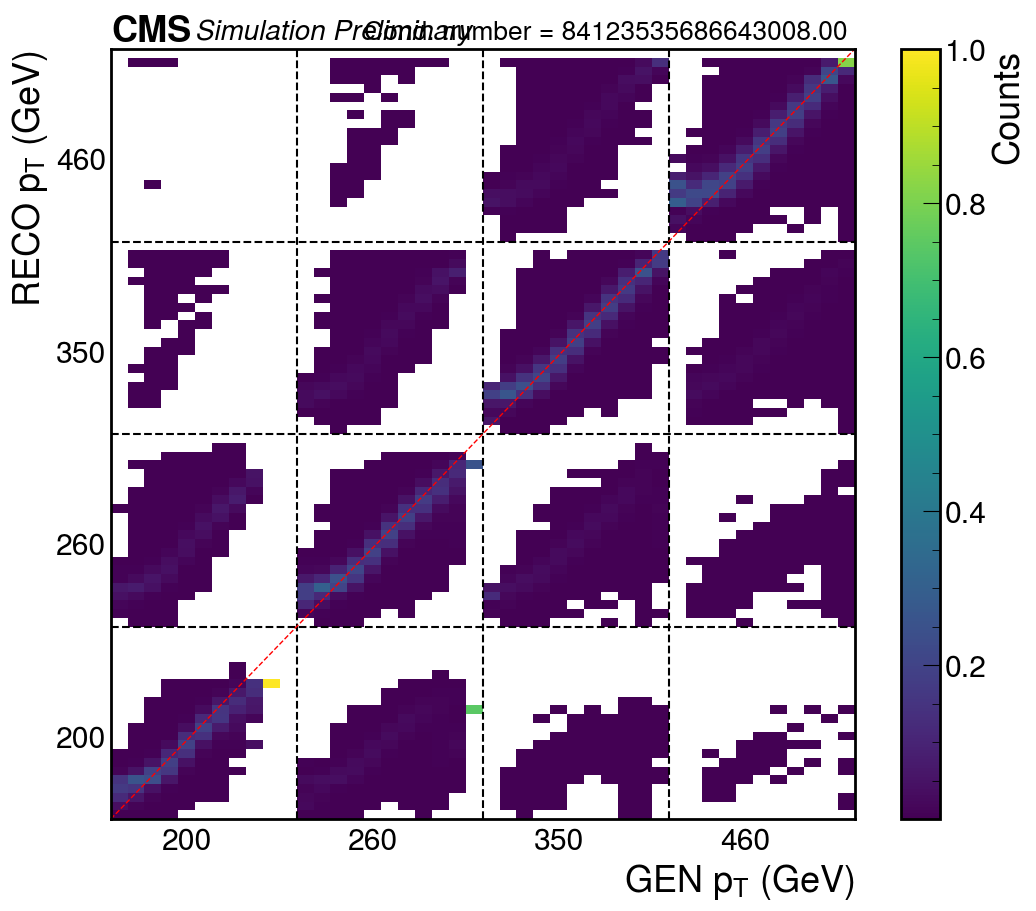

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing 

In [95]:
unfolder.plot_response_matrix(probability_matrix=True)

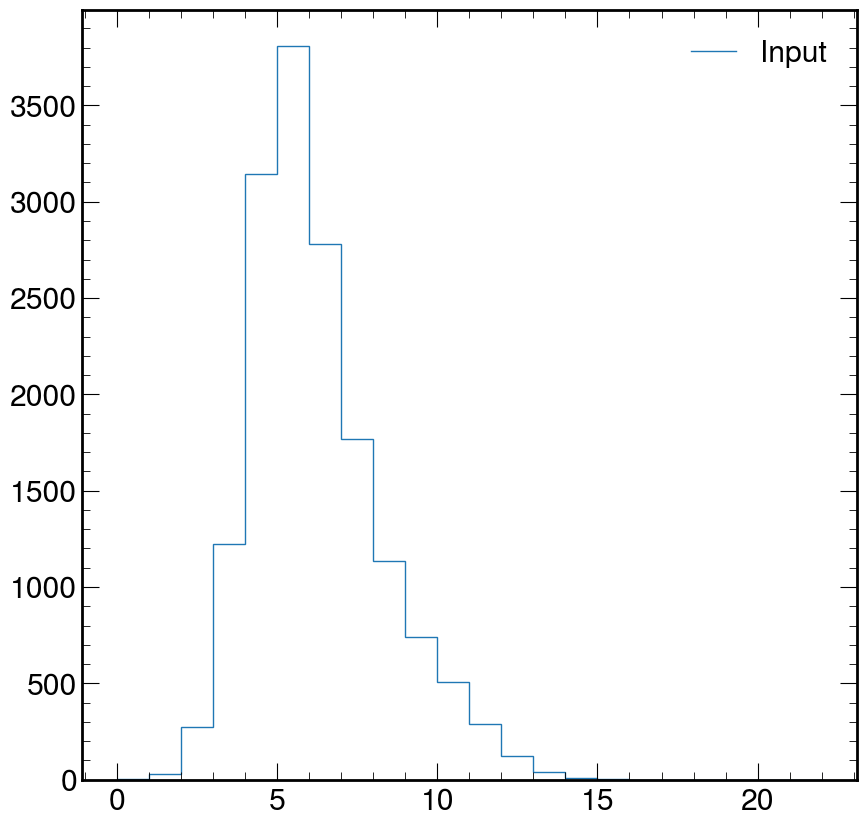

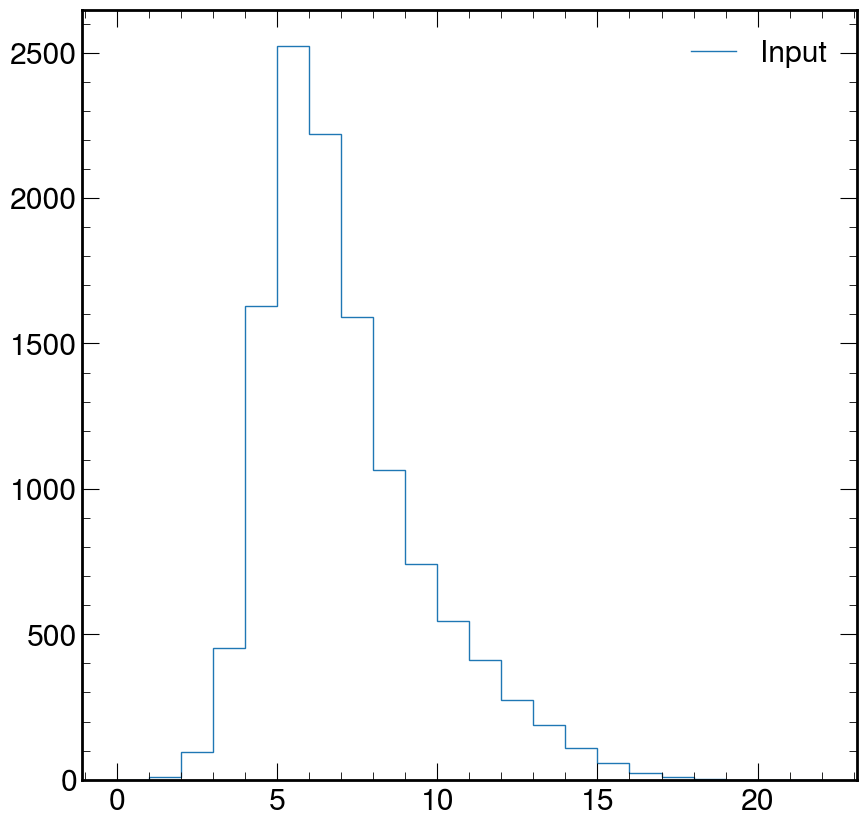

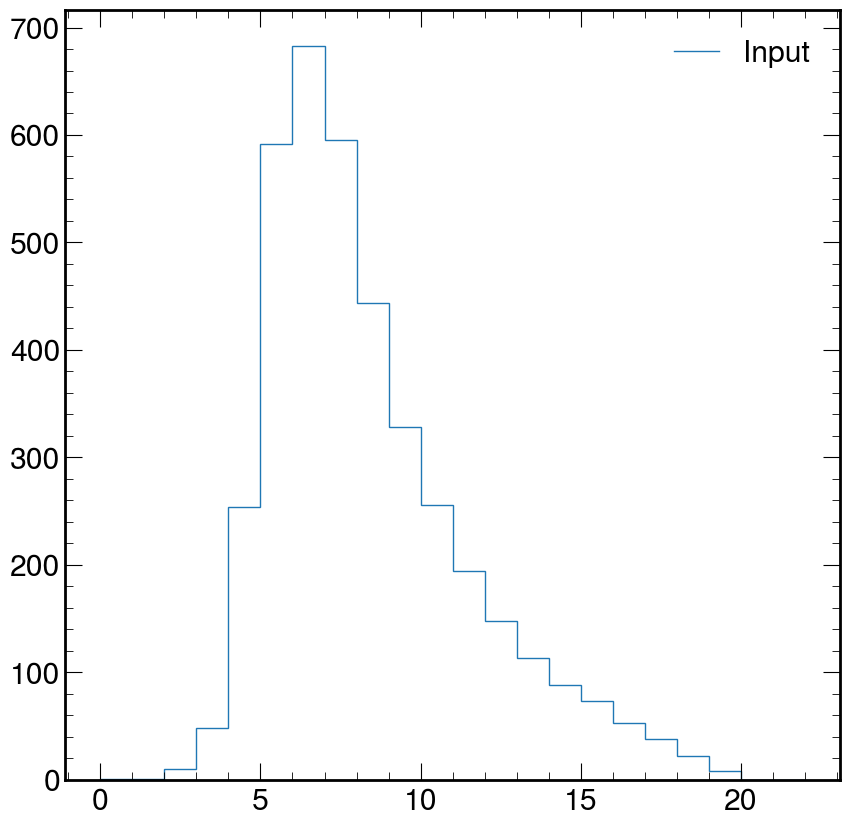

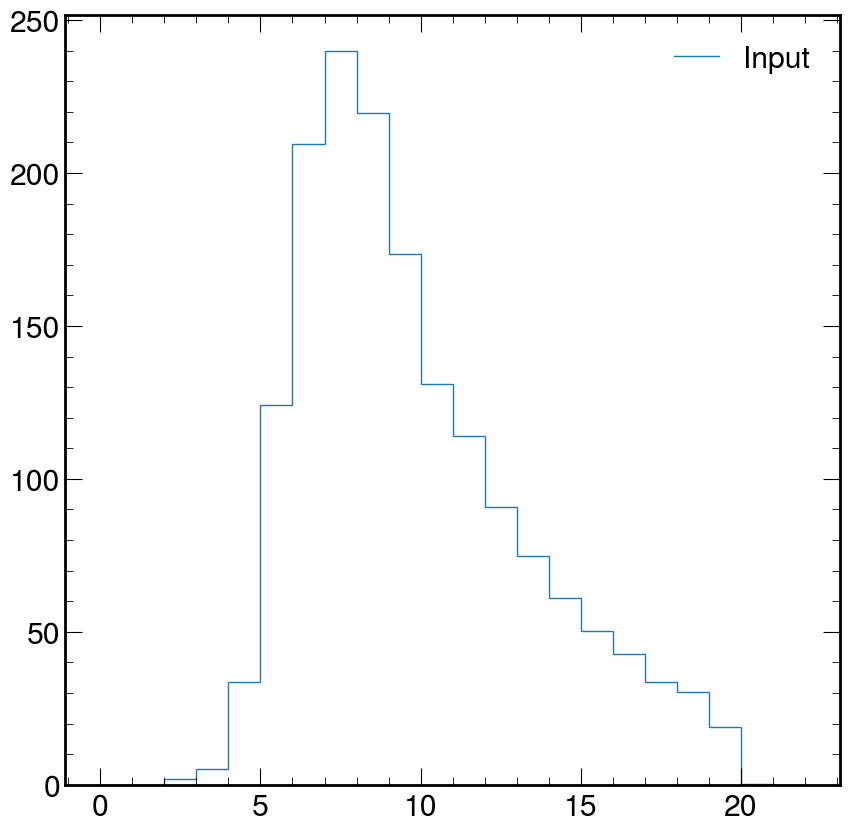

In [96]:
unfolder.plot_input()

In [97]:
len(sys_matrix_dic)

121

In [98]:
#sys_matrix_dic.pop('eletrigUp')

Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 8.545530024819846e-05


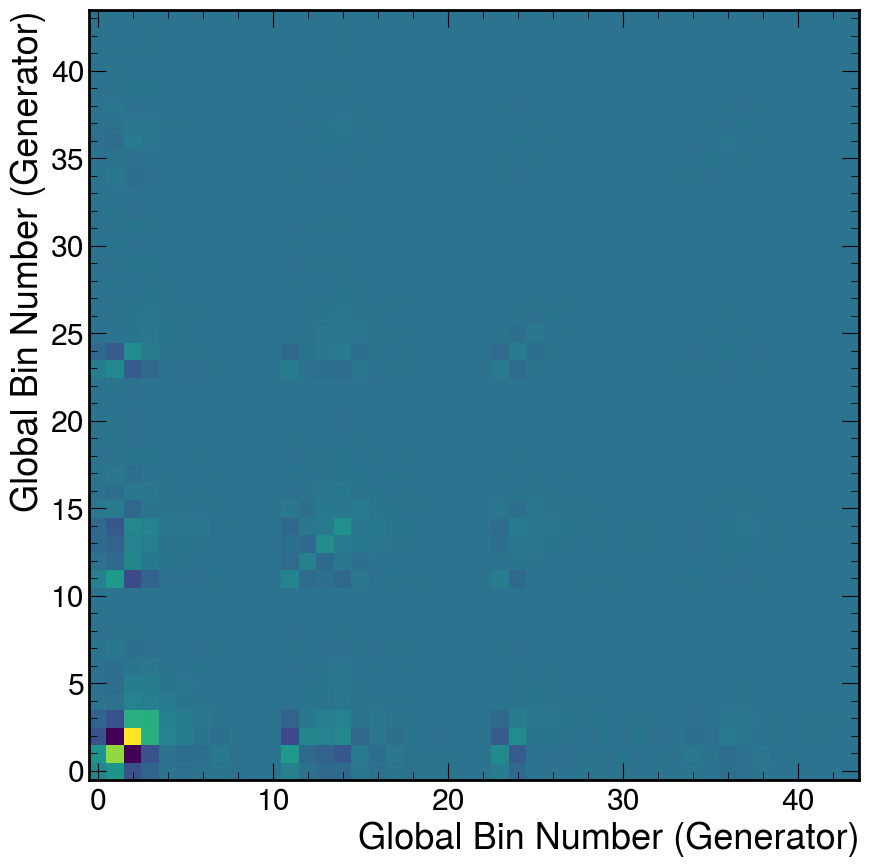

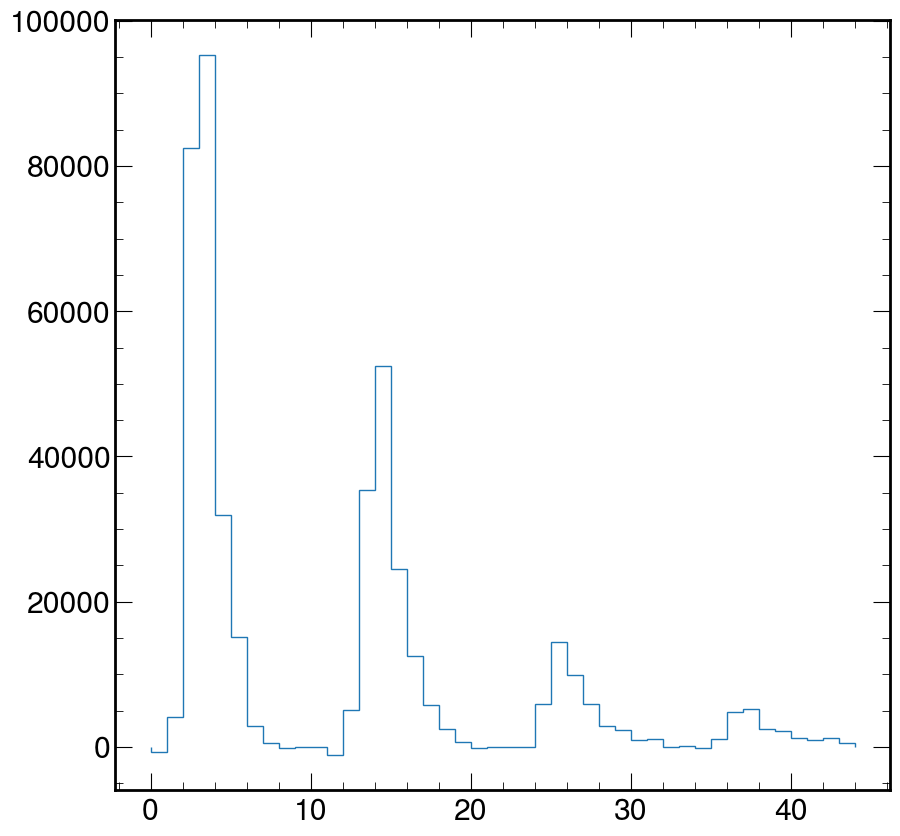

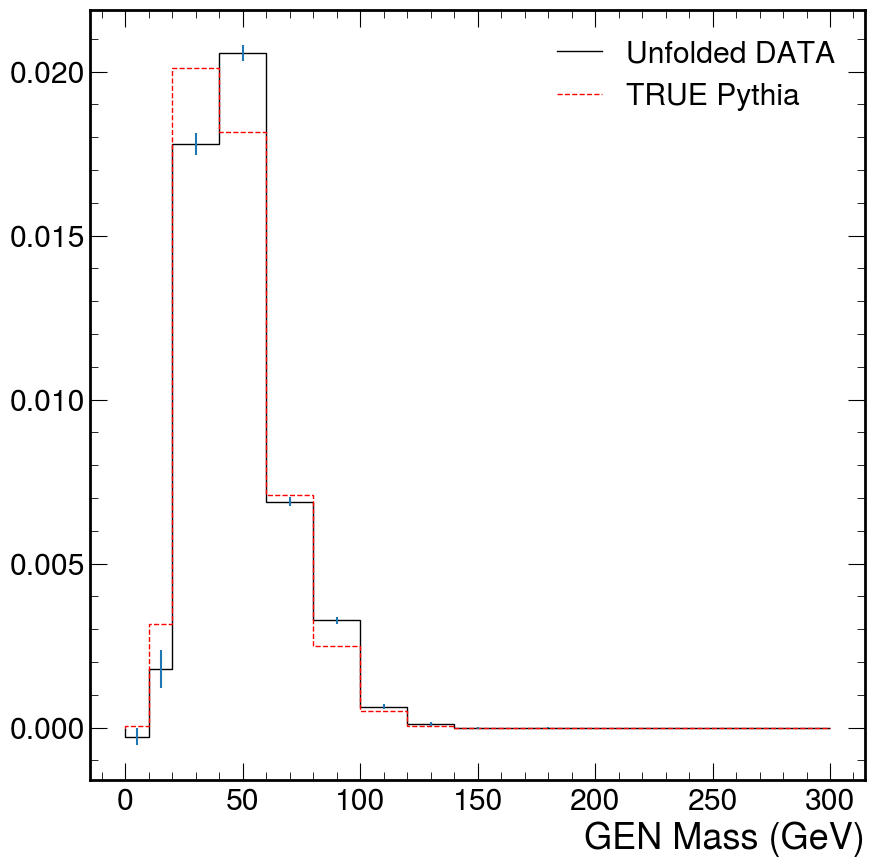

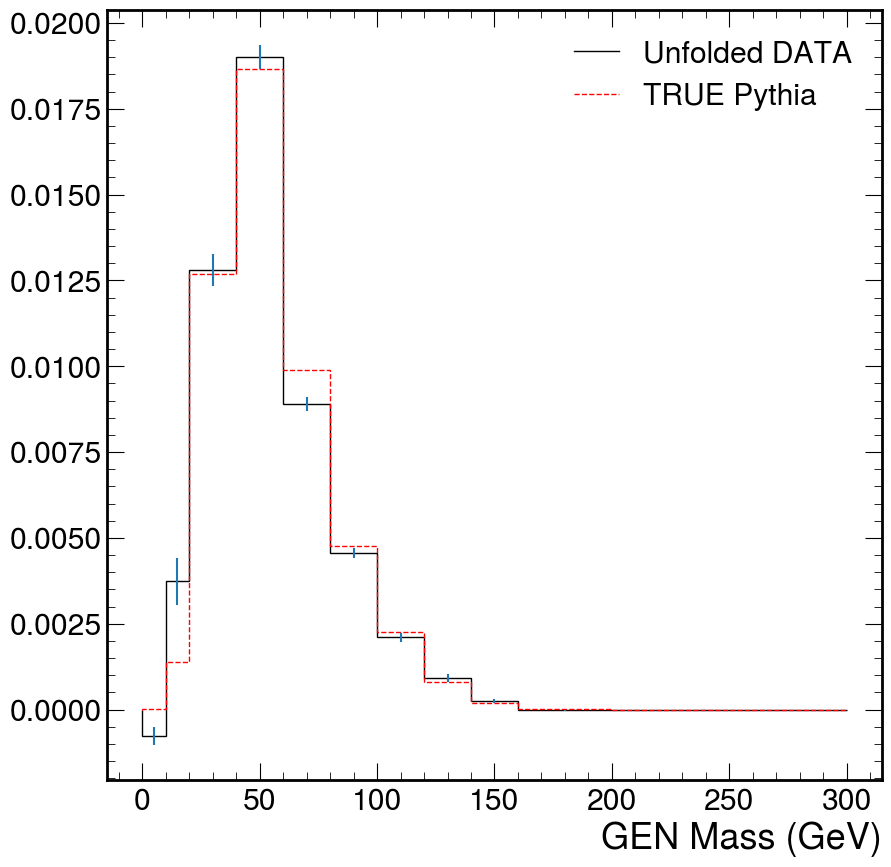

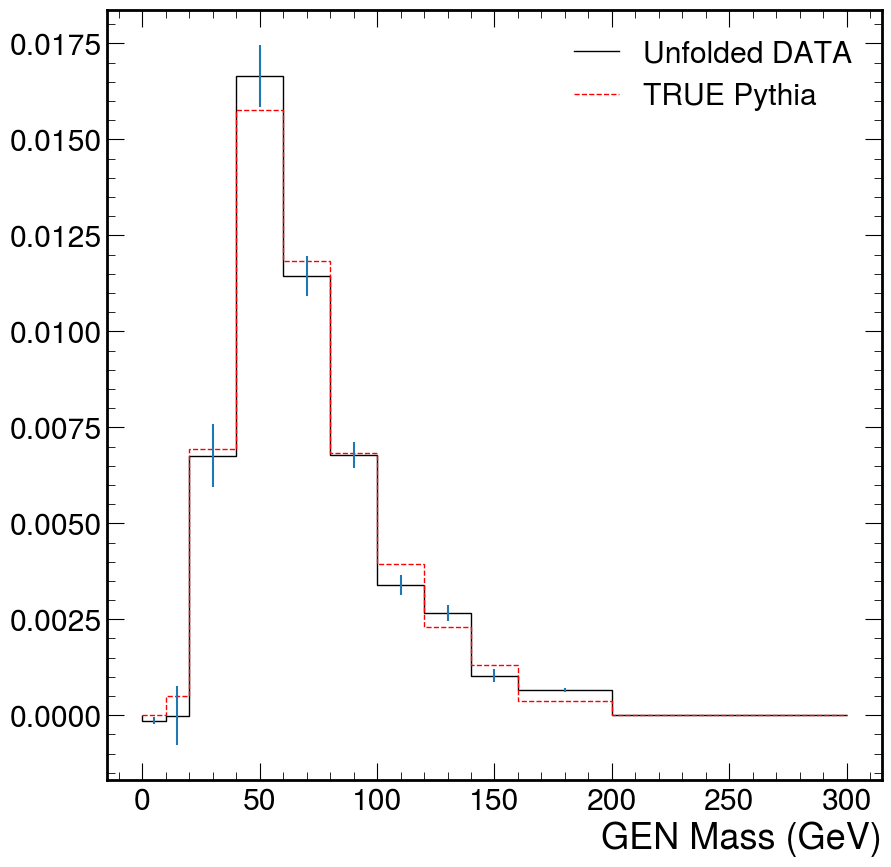

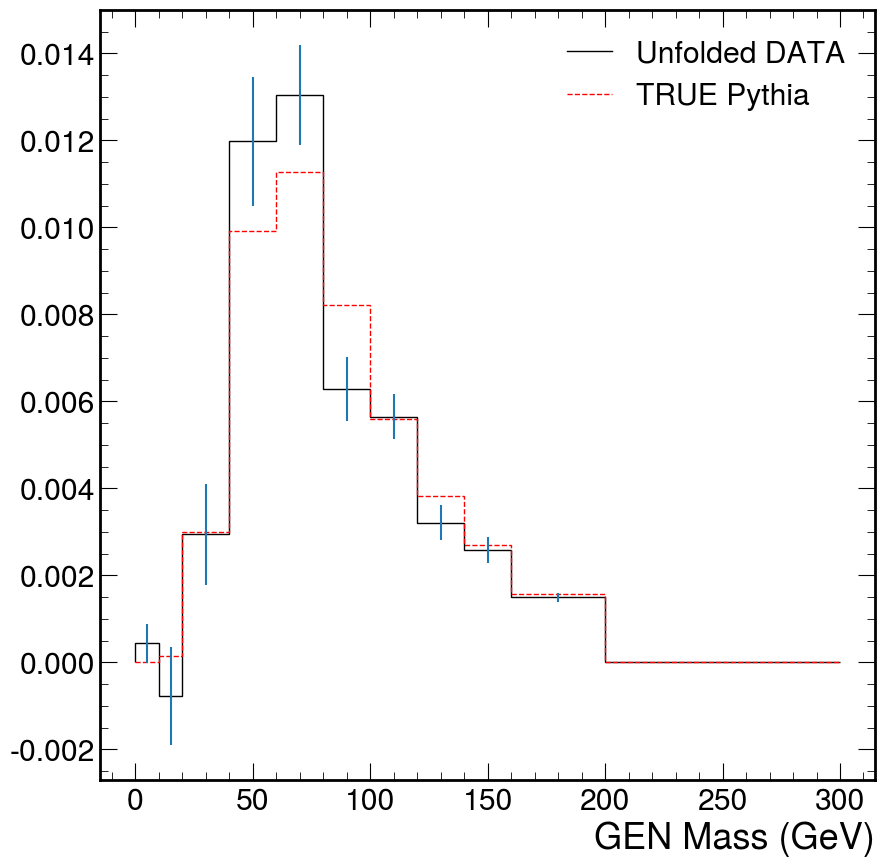

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing 

In [99]:
unfolder.perform_unfold()

# Plot the covariance matrix or unfolded distributions:
unfolder.plot_covariance()
unfolder.plot_unfolded()

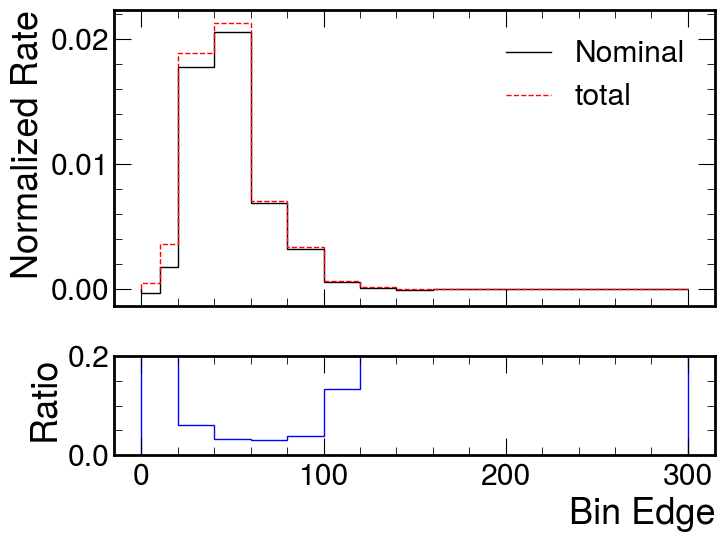

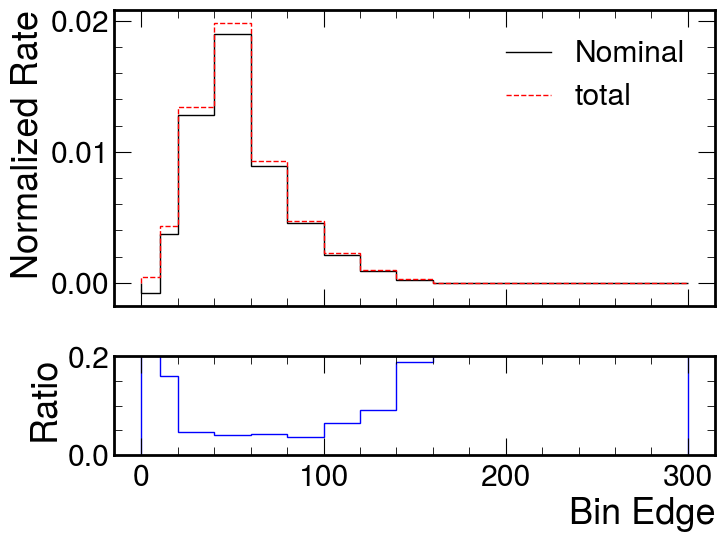

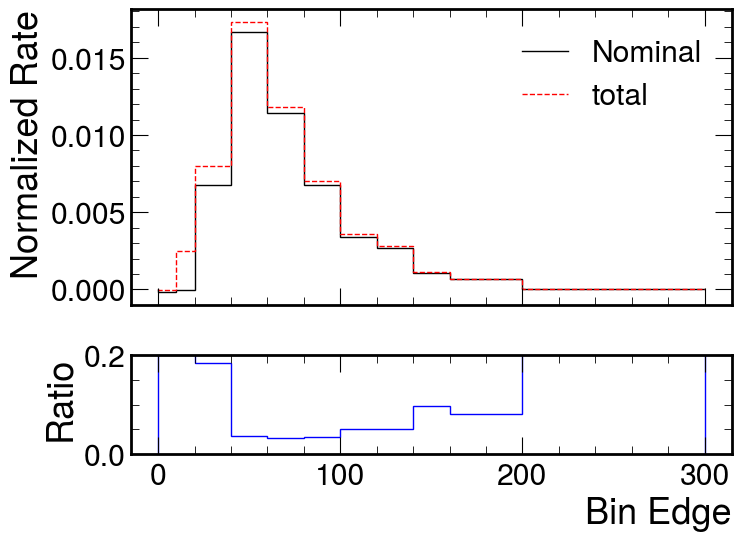

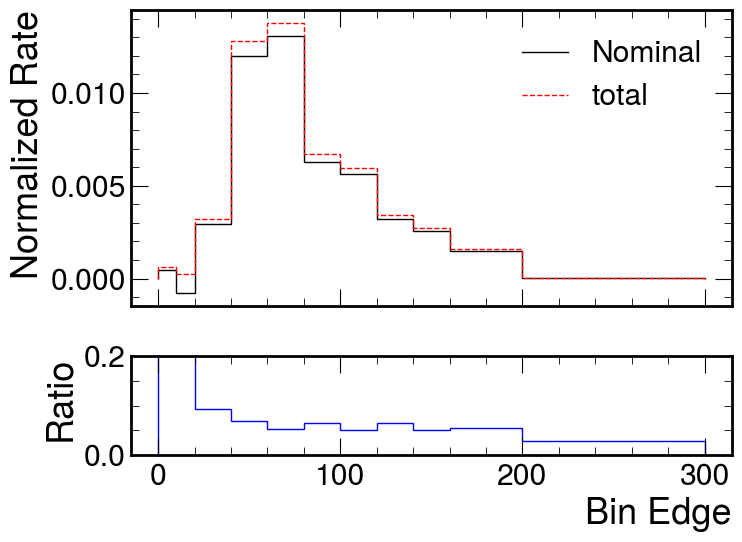

In [100]:
unfolder.plot_systematic("total")

Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 8.545530024819846e-05


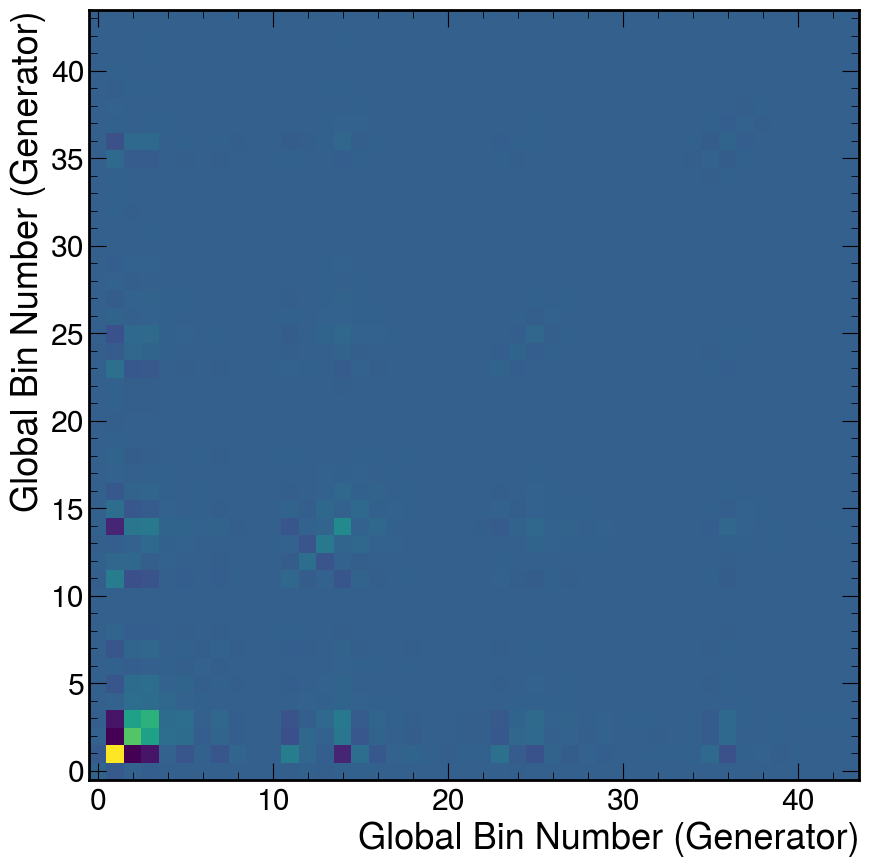

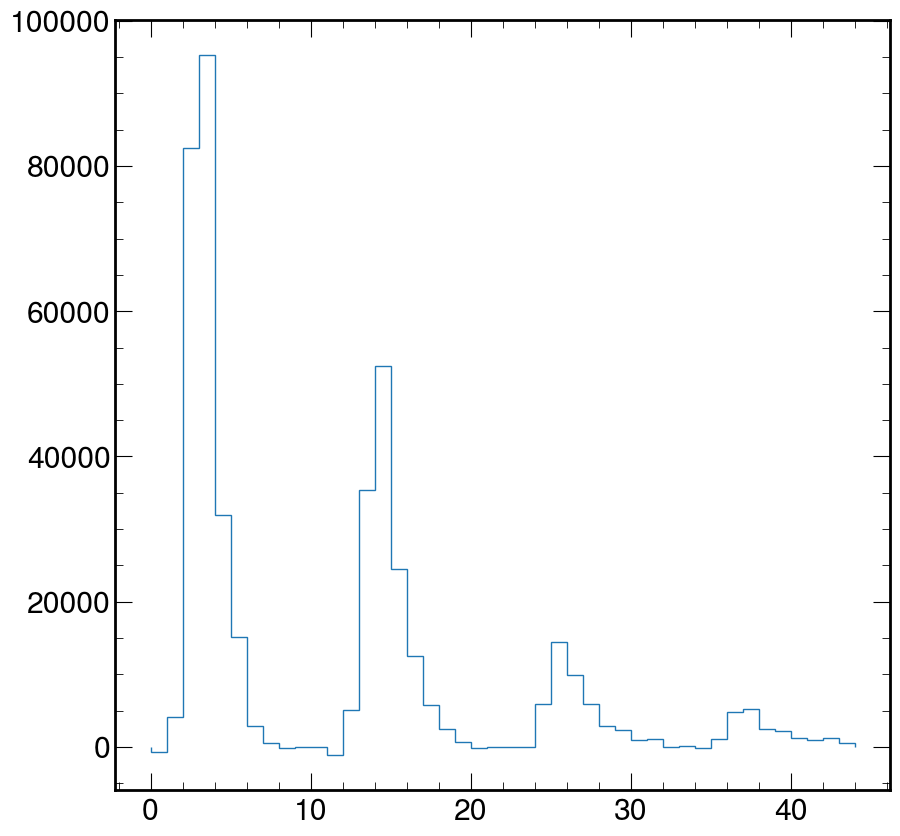

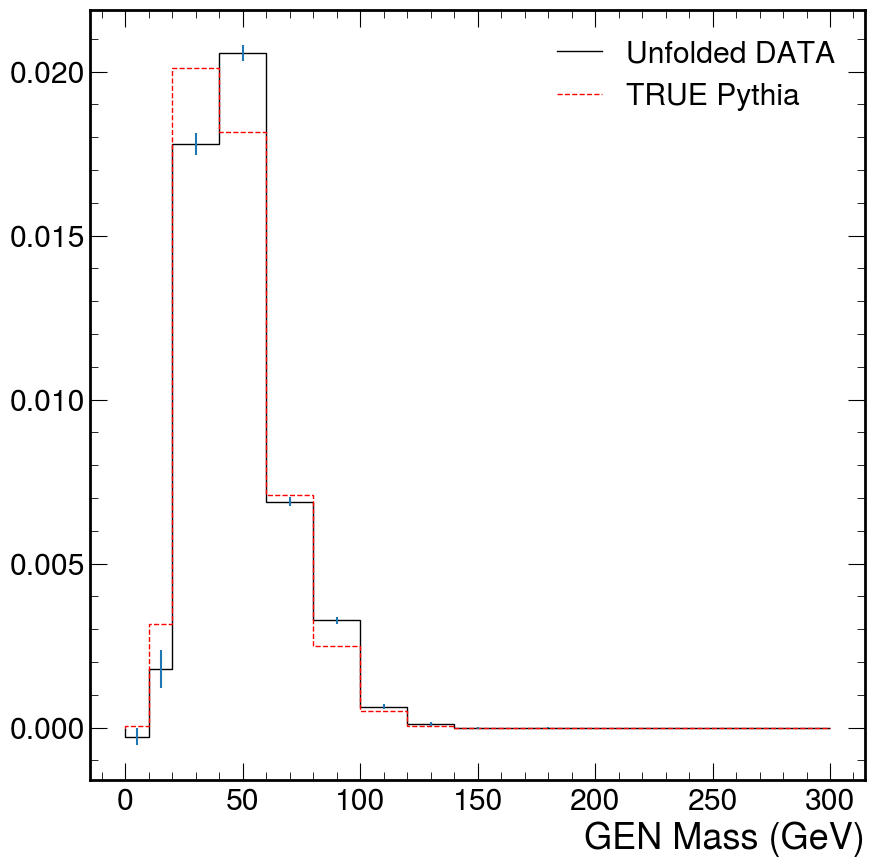

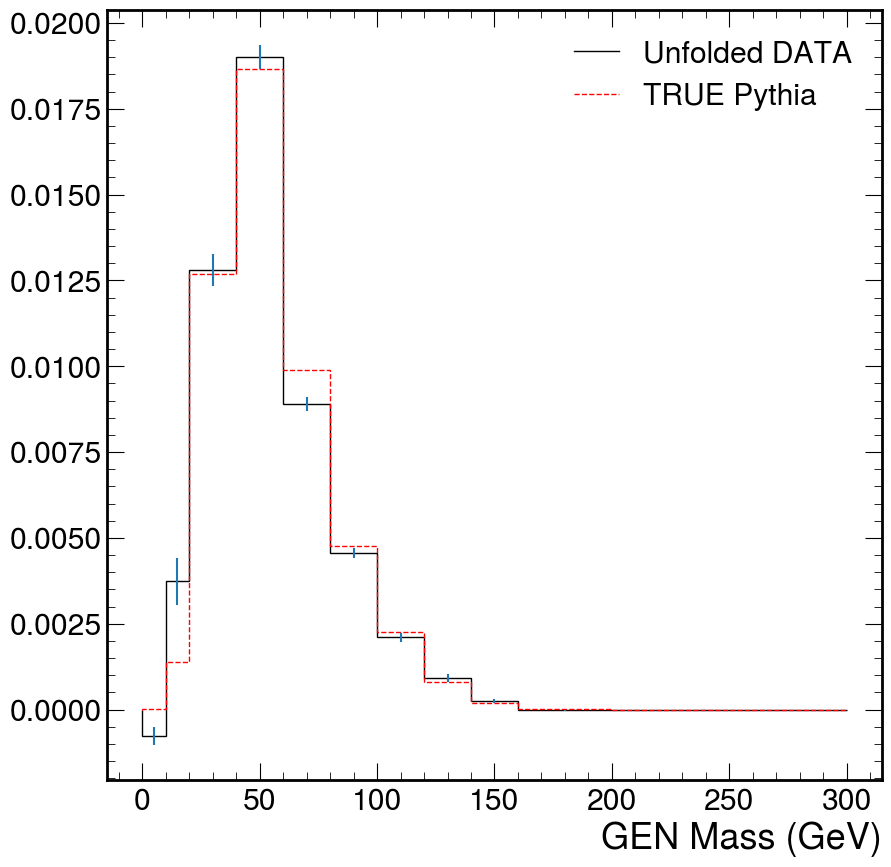

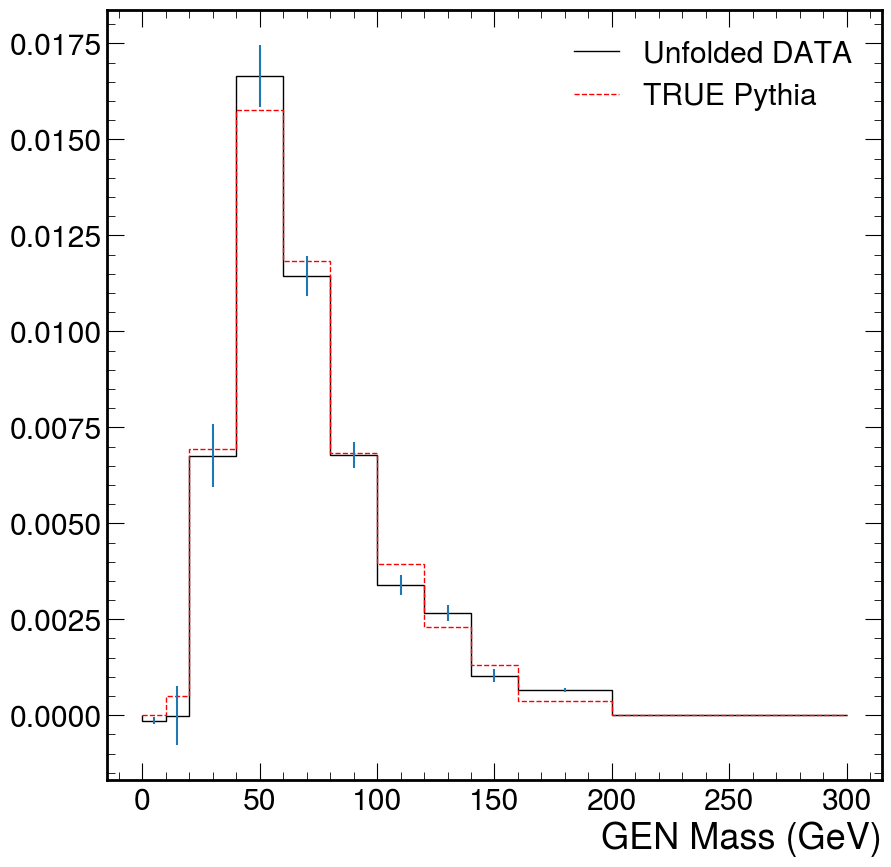

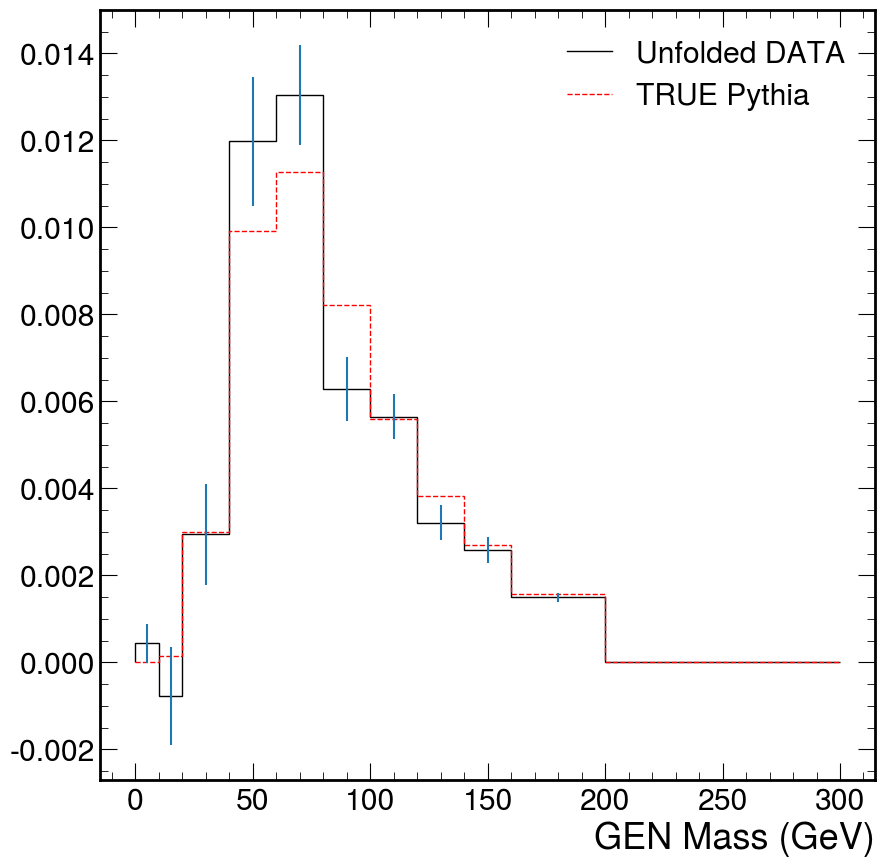

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasDown_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleDown_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing

In [101]:
unfolder_dn.perform_unfold()

# Plot the covariance matrix or unfolded distributions:
unfolder_dn.plot_covariance()
unfolder_dn.plot_unfolded()

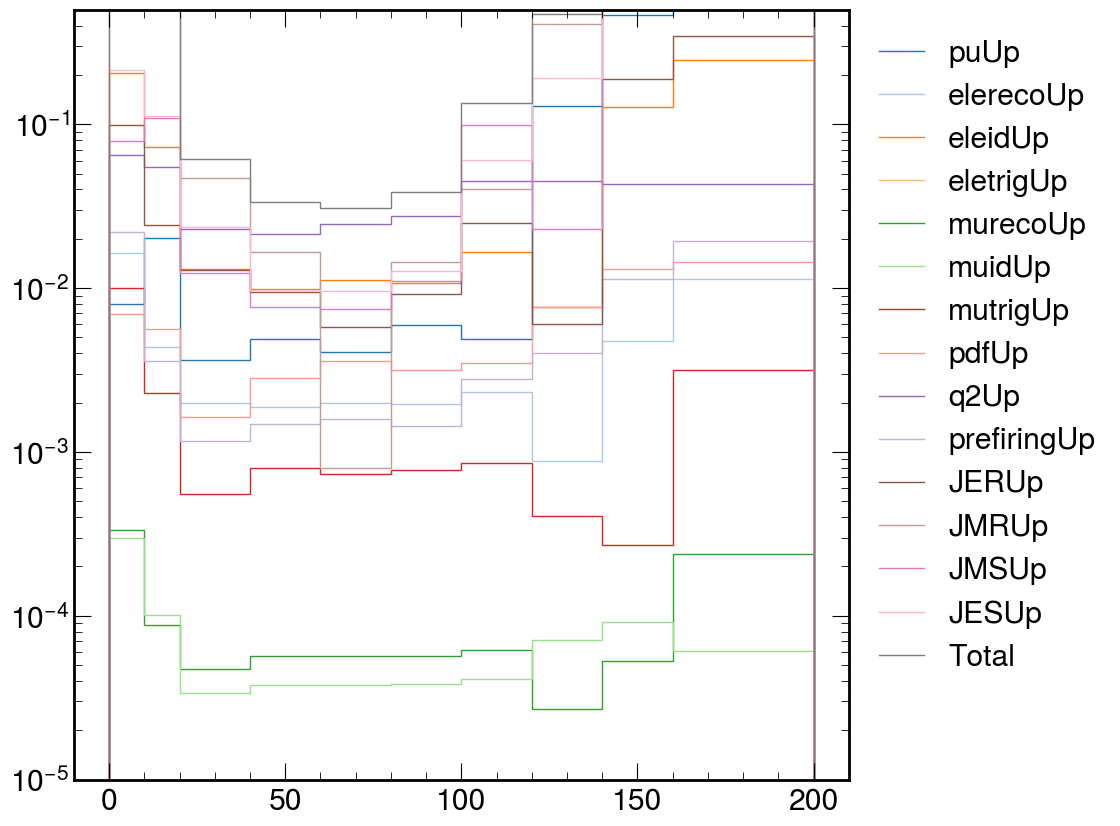

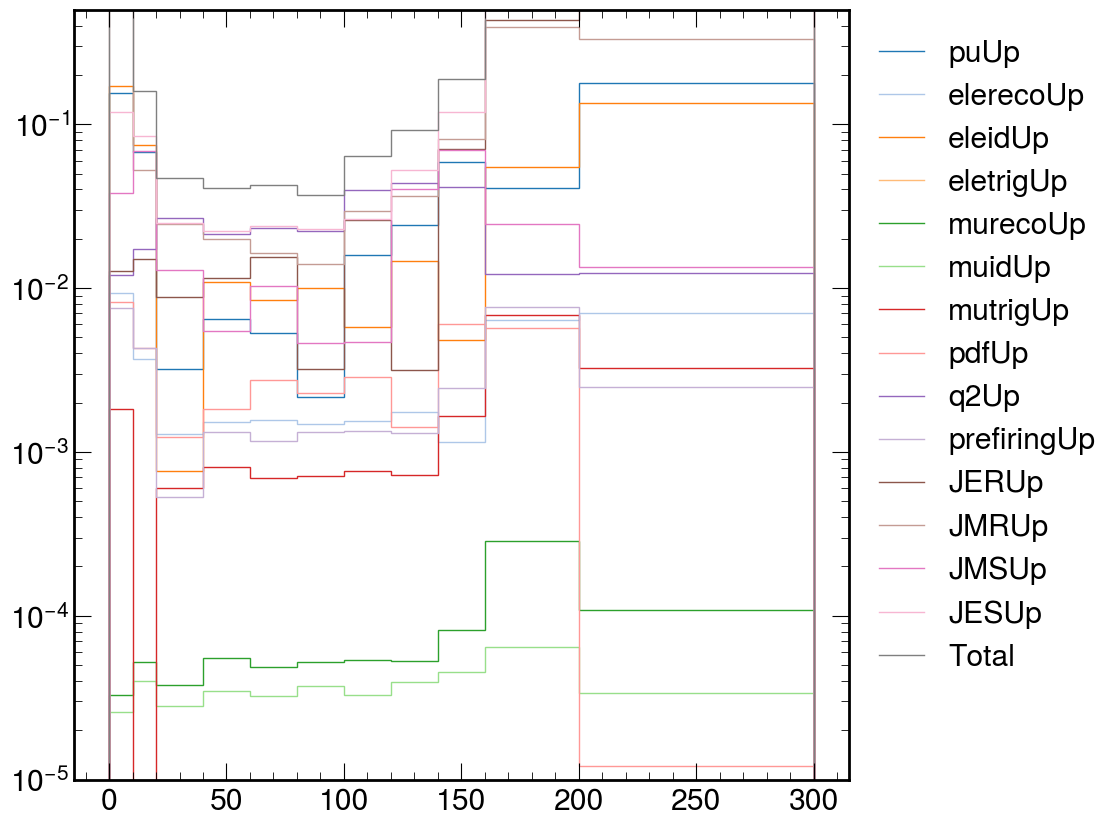

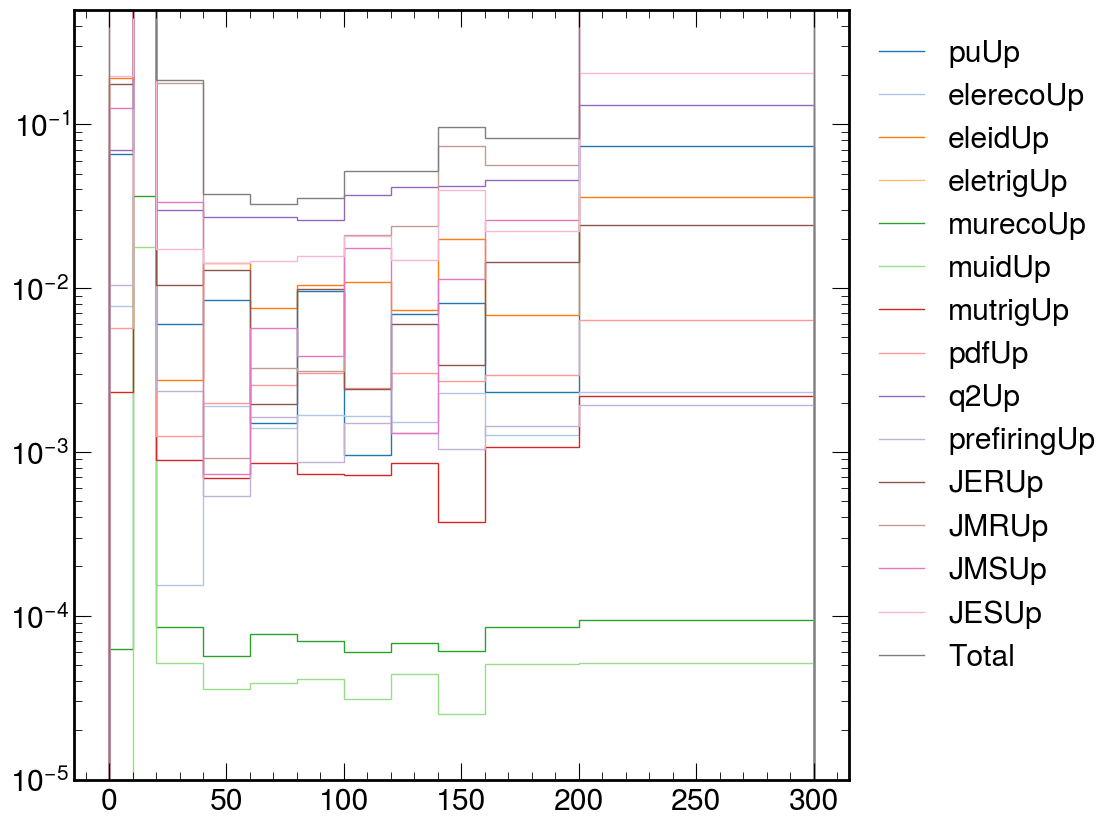

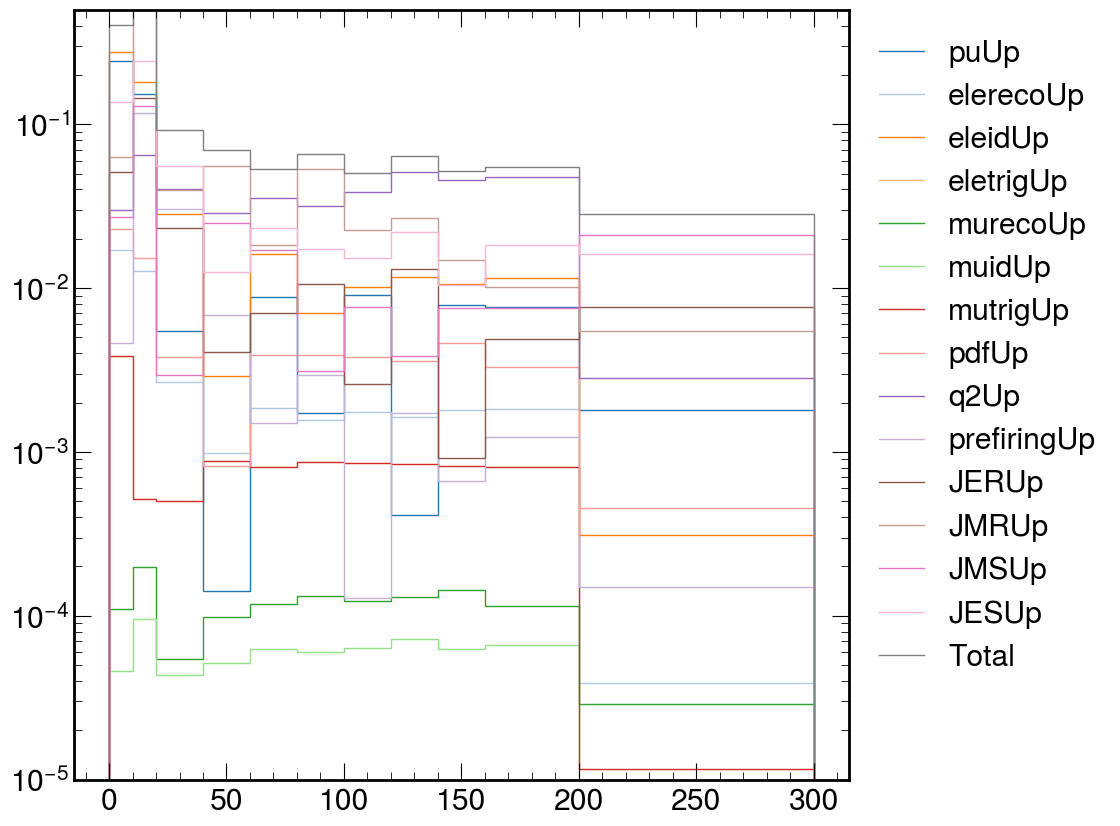

In [105]:
unfolder.plot_systematic_frac()

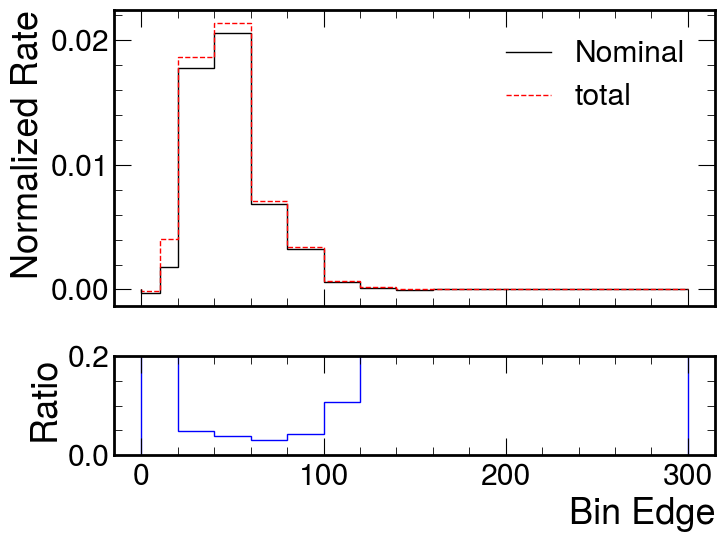

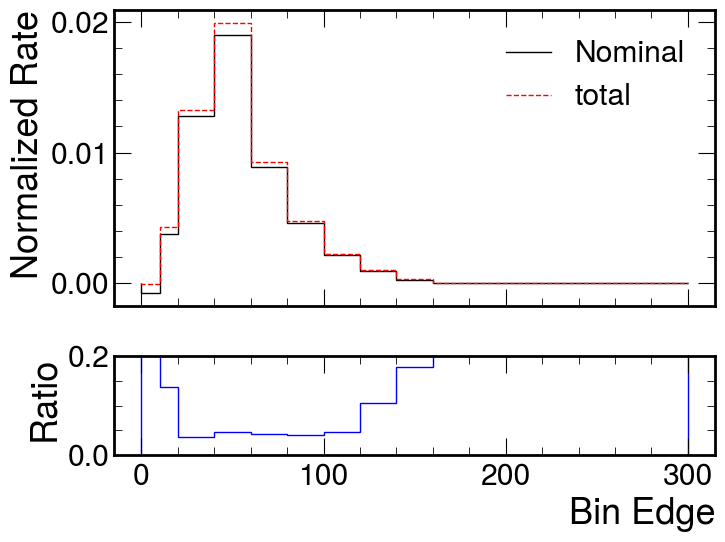

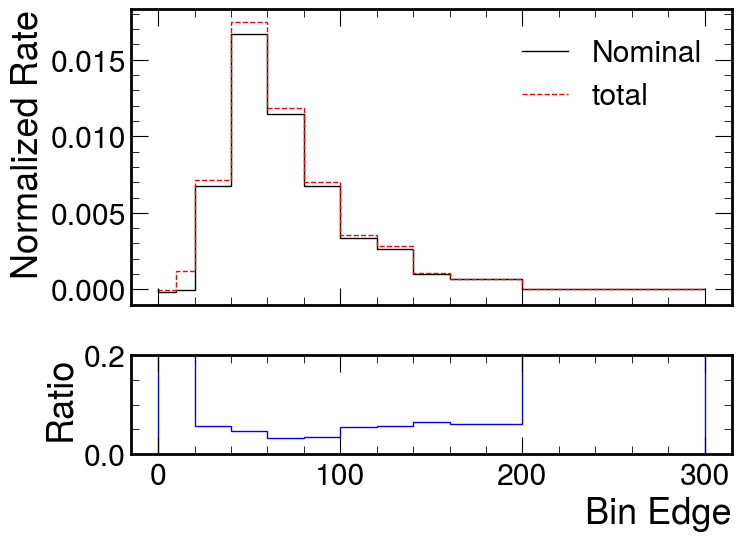

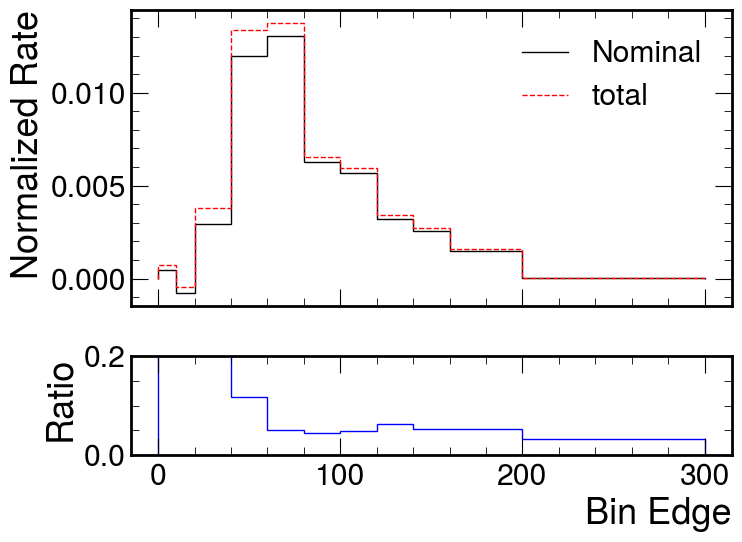

In [103]:
unfolder_dn.plot_systematic('total')

In [104]:
unfolder.total_sys_jes[i*unfolder_dn.nmbinsGen  :(i+1)*unfolder_dn.nmbinsGen]

AttributeError: 'Unfolder' object has no attribute 'total_sys_jes'

/tmp/ipykernel_939/1260745967.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(unfolder.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESUp" , color = 'red')
/tmp/ipykernel_939/1260745967.py:4: RuntimeWarning: invalid value encountered in divide
  plt.stairs(-unfolder_dn.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESDown", ls = '--' , color = 'blue')


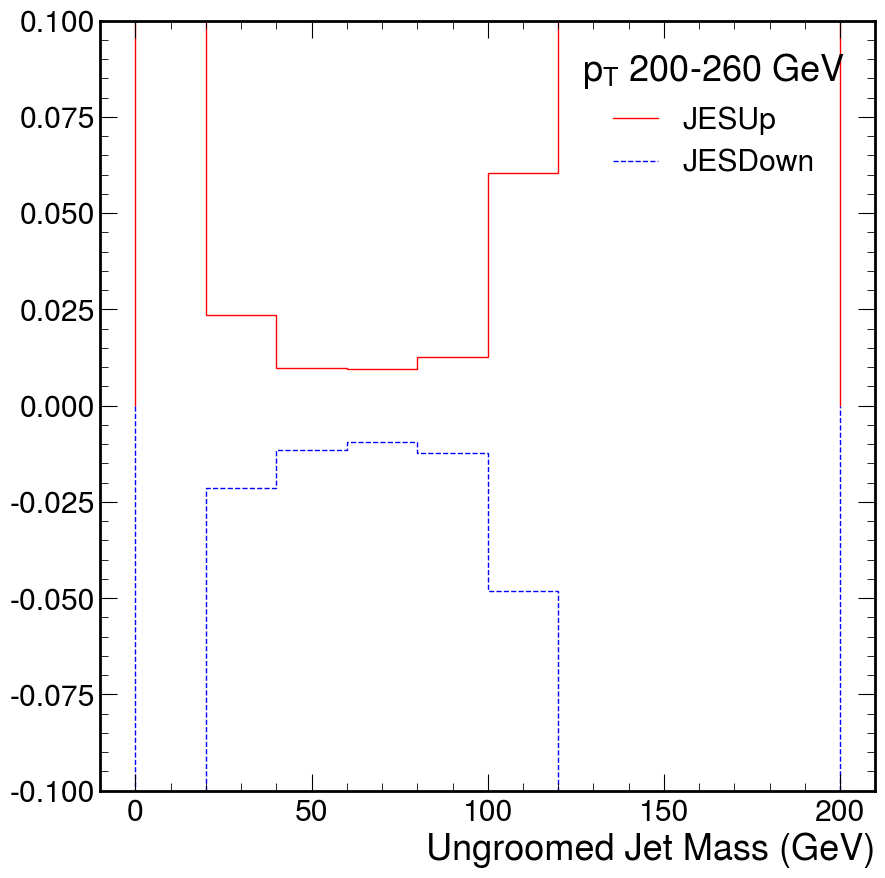

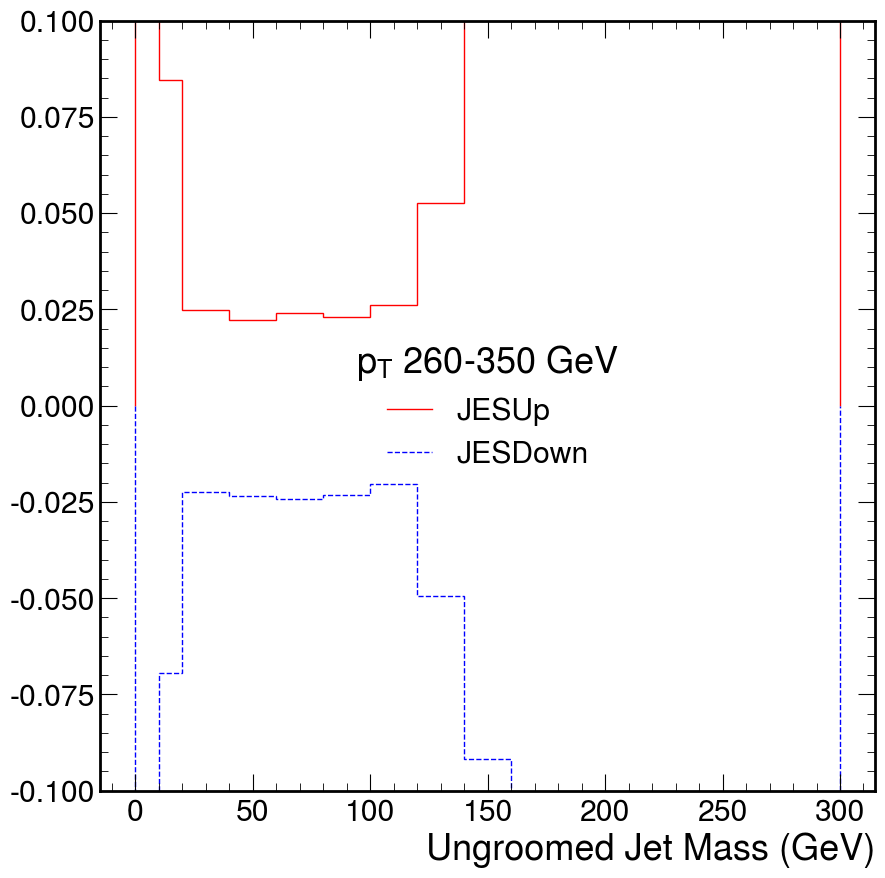

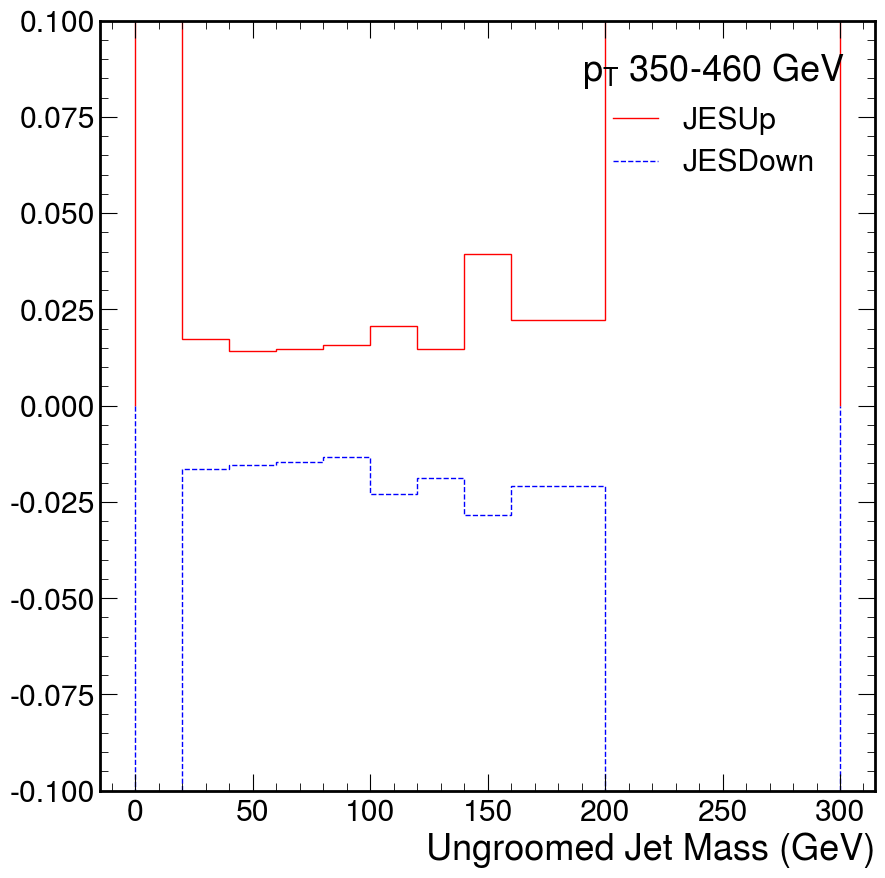

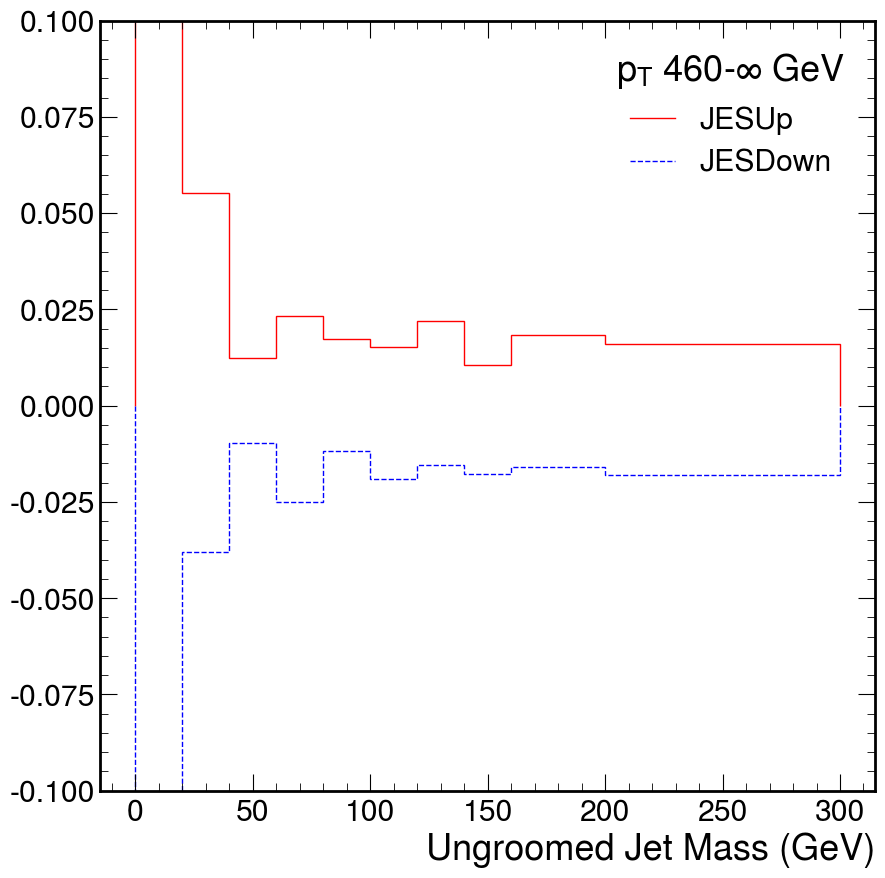

In [107]:
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]
for i in range(4):
    plt.stairs(unfolder.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESUp" , color = 'red')
    plt.stairs(-unfolder_dn.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESDown", ls = '--' , color = 'blue')
    plt.legend(title = title_list[i])
    plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    
    plt.show()

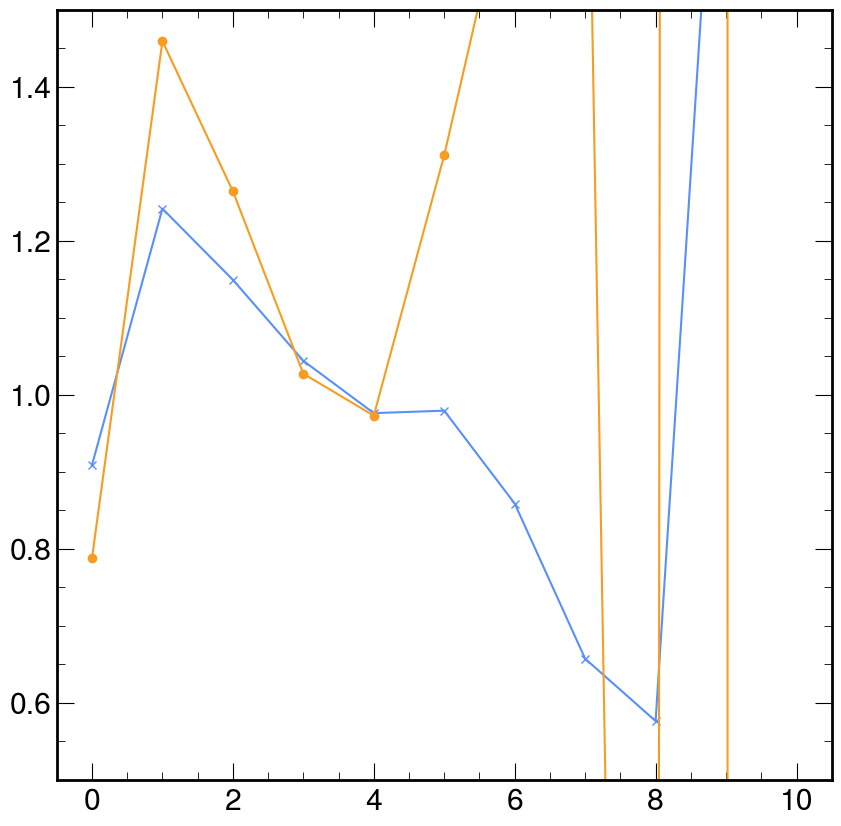

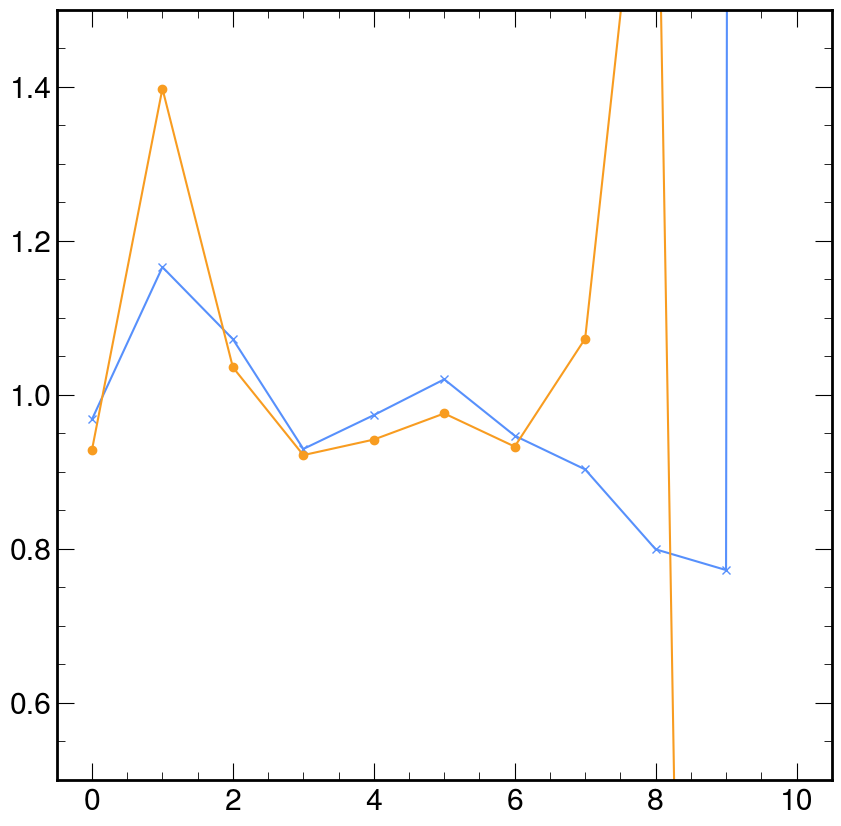

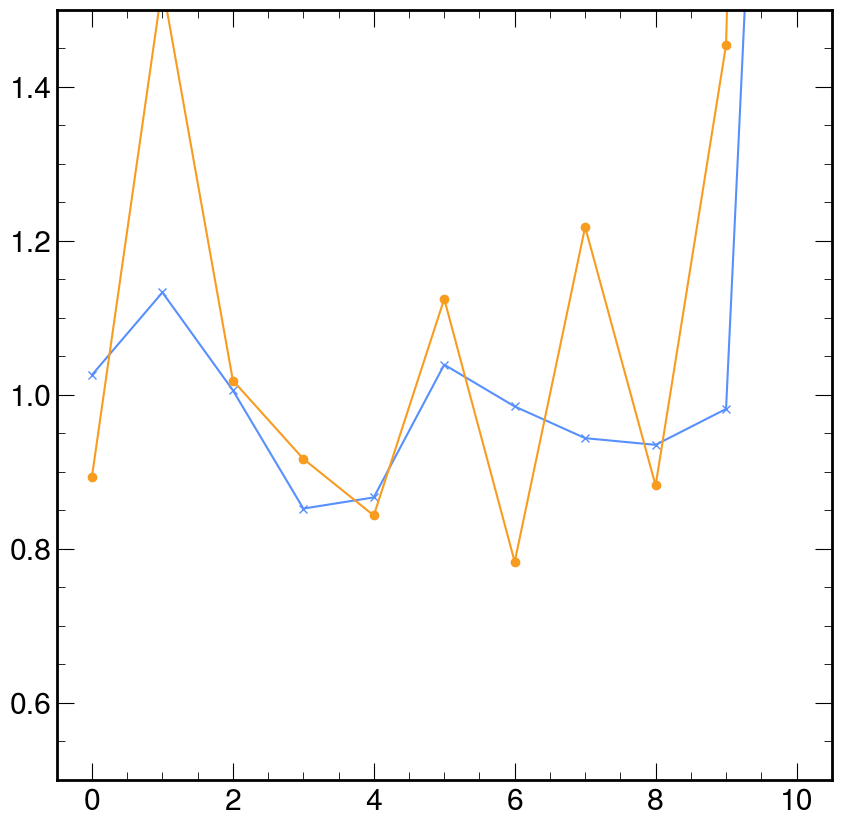

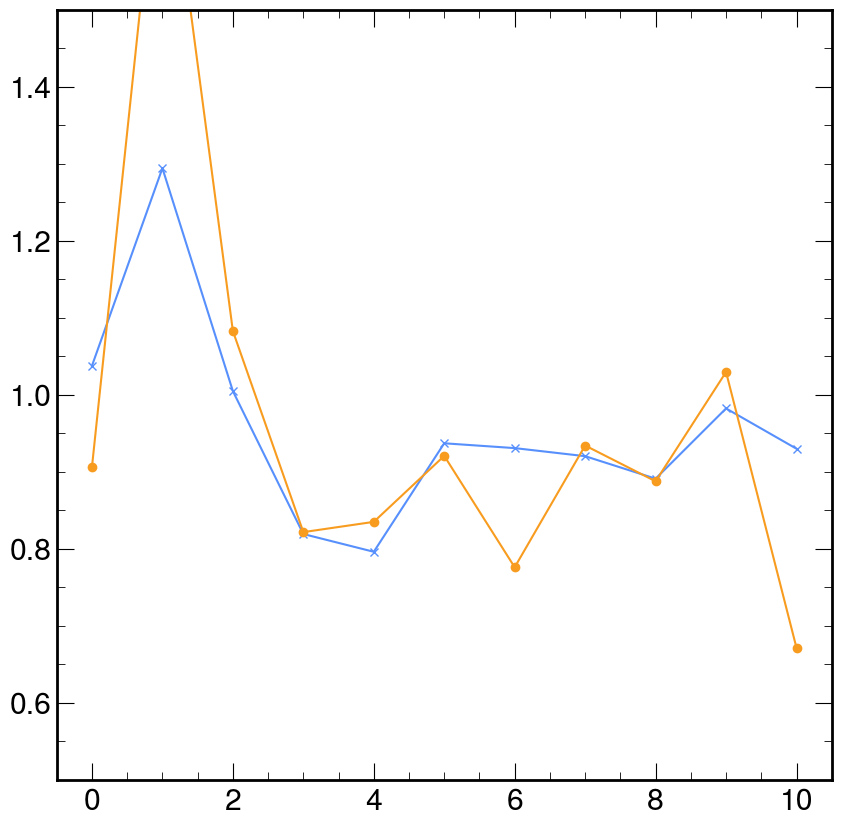

In [68]:
mc = resp_matrix_4d.project("ptgen", "mgen").values()
mc_errors = resp_matrix_4d.project("ptgen", "mgen").variances()**0.5

for i in range(4):

    mc[i] = mc[i]/mc[i][:-1].sum()
    data_postunfold = unfolder.get_results()[0][i]/unfolder.get_results()[0][i][:-1].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i,hist.rebin(2)].values()/input_data.project("ptreco", "mreco")[i,hist.rebin(2)].values()[:-1].sum()
    
    plt.plot(data_preunfold/mc[i], marker = 'x')
    plt.plot(data_postunfold/mc[i], marker = 'o')
    plt.ylim(0.5,1.5)
    plt.show()


    

In [538]:
for i in range(4):
    # Normalize the distributions
    fig = plt.figure(figsize = (10,4))
    mc[i] = mc[i] / mc[i].sum()
    data_postunfold = unfolder.get_results()[0][i] / unfolder.get_results()[0][i].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values() / input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values().sum()

    # Calculate uncertainties (example: Poisson sqrt)
    mc_unc = np.sqrt(mc[i]) / mc[i].sum()
    pre_unc = np.sqrt( unfolder.get_results()[0][i]) / unfolder.get_results()[0][i].sum()/mc[i].sum()
    post_unc = np.sqrt( input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()) /  input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values().sum()/mc[i].sum()

    # Plot using stairs with uncertainty bars
    plt.stairs(data_preunfold/mc[i], edges=mgen_edge_mod, label='Pre-unfold / MC', color='blue', ls = '--')
    plt.errorbar((mgen_edge_mod[:-1] + mgen_edge_mod[1:]) / 2, data_preunfold/mc[i], yerr=pre_unc, fmt='x', color='blue')

    plt.stairs(data_postunfold/mc[i], edges=mgen_edge_mod, label='Post-unfold / MC', color='green')
    plt.errorbar((mgen_edge_mod[:-1] + mgen_edge_mod[1:]) / 2, data_postunfold/mc[i], yerr=post_unc, fmt='o', color='green')
    plt.hlines([1], 0, 240 , color = 'k')
    plt.ylim(0.5, 1.5)
    plt.xlim(0,240)
    if groomed:
        plt.xlabel('Groomed Jet Mass (GeV)')
    else:
        plt.xlabel('Ungroomed Jet Mass (GeV)')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()


AttributeError: 'Unfolder' object has no attribute 'total_error_pt_binned'

<Figure size 1000x400 with 0 Axes>

In [539]:
herwig_input = resp_matrix_4d_herwig.project('ptreco', 'mreco')

In [540]:
unfolder_herwig = Unfolder(herwig_input, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            systematics = sys_matrix_dic,
                            #systematics= None,
                            closure = False,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

11
[0.0e+00 1.0e+01 2.0e+01 4.0e+01 6.0e+01 8.0e+01 1.0e+02 1.2e+02 1.4e+02
 1.6e+02 2.0e+02 1.3e+04]
22
[0.0e+00 5.0e+00 1.0e+01 1.5e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01
 7.0e+01 8.0e+01 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02
 1.6e+02 1.8e+02 2.0e+02 6.2e+03 1.3e+04]
Signal Binning created
Detector Binning created


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:122: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))


In [541]:
unfolder_herwig.perform_unfold(0.00)

Working until background subtractions
Unfolder object created
Regularisation USED Custom
Tau value 0.0


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing 

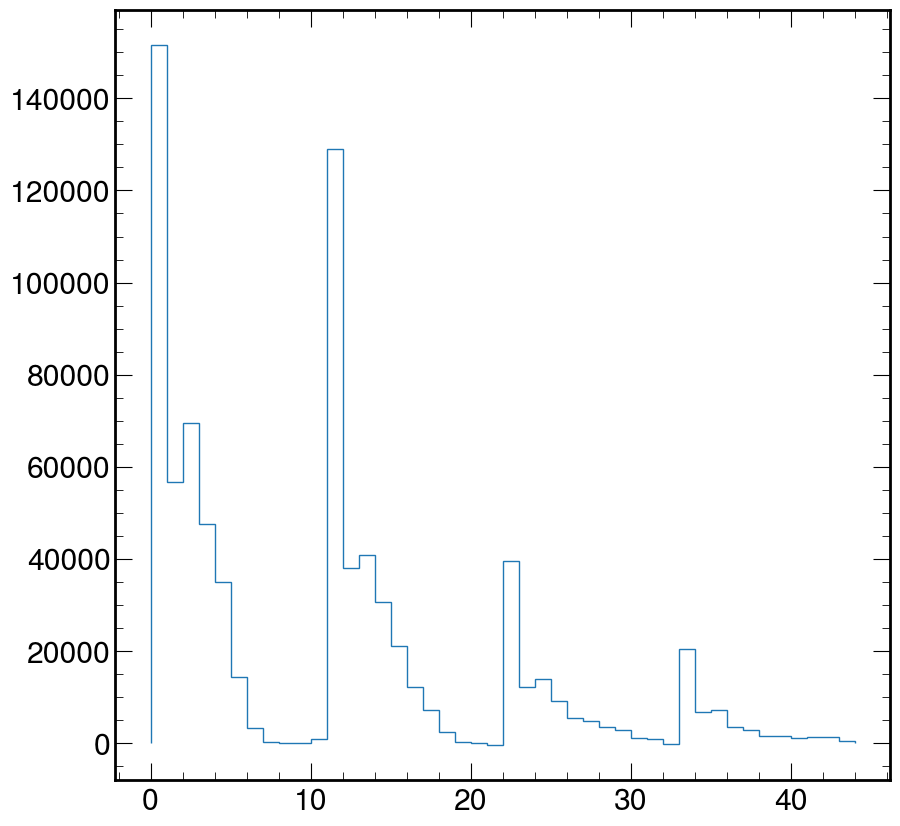

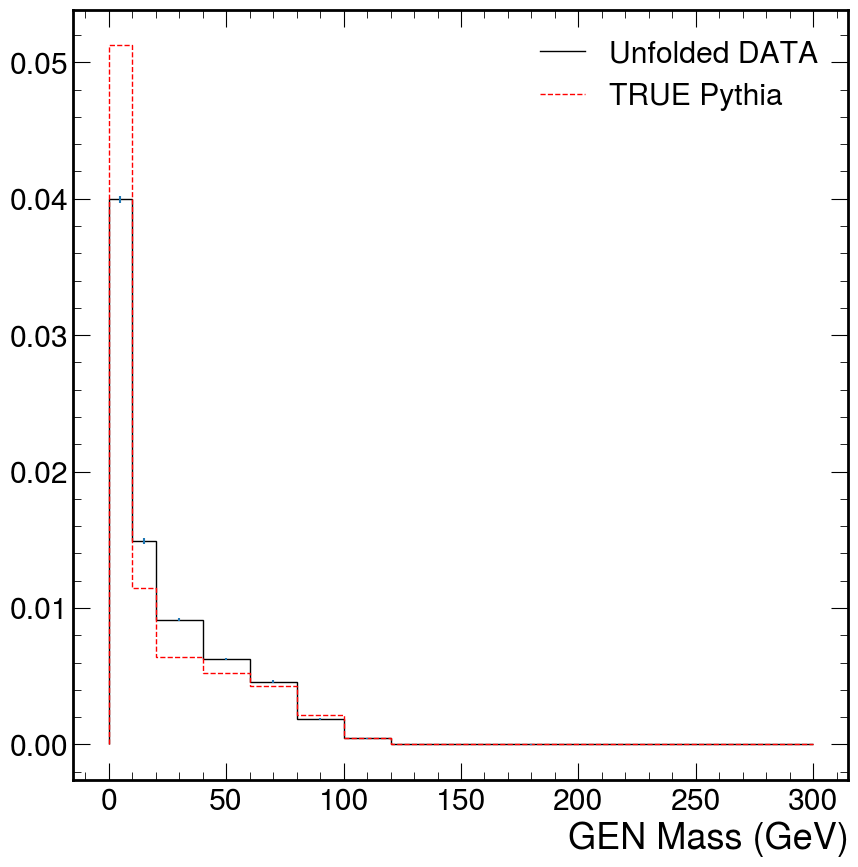

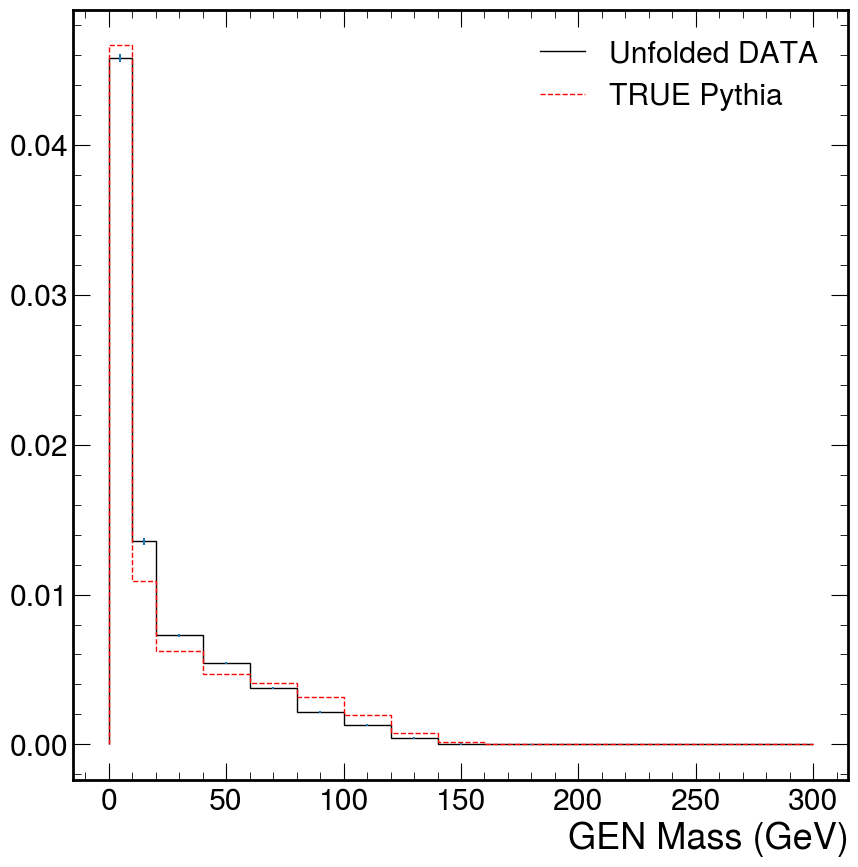

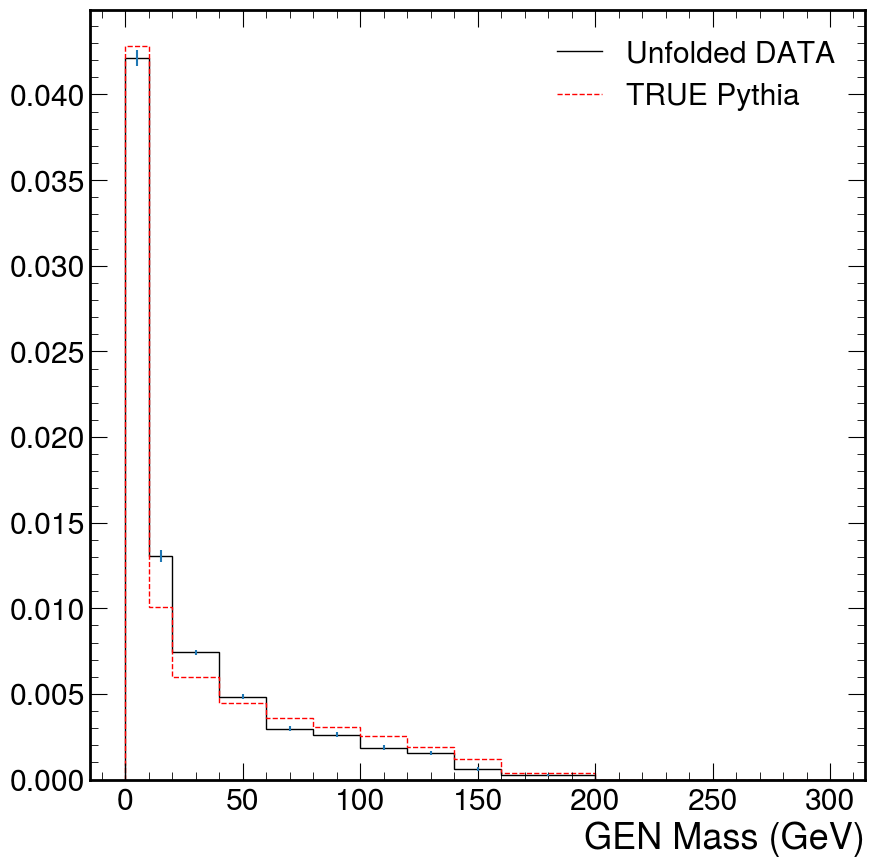

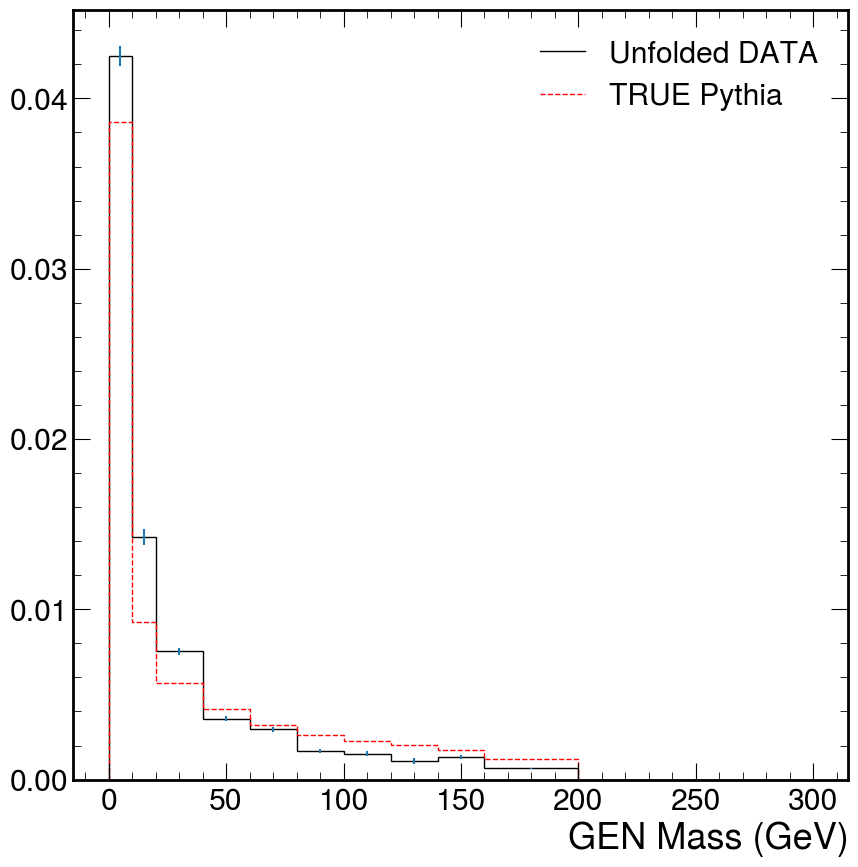

In [542]:
unfolder_herwig.plot_unfolded()

In [543]:
def make_comparison_plot(data1, unc1, data2, unc2, x_edges):
    """
    Create a two-panel figure:
      - Top: data1 (stepped line + shaded uncertainty) vs. data2 (points with error bars)
      - Bottom: (data2/data1 - 1) vs. x, with a band showing the fractional uncertainty of data1.

    Parameters
    ----------
    data1 : array-like
        Central values for the first (nominal) distribution in each bin.
    unc1 : array-like
        Uncertainties for the first (nominal) distribution in each bin.
    data2 : array-like
        Central values for the second (alternative) distribution in each bin.
    unc2 : array-like
        Uncertainties for the second (alternative) distribution in each bin.
    x_edges : array-like
        The bin edges in x (length should be len(data1)+1).

    Returns
    -------
    fig : matplotlib.figure.Figure
    (ax_top, ax_bot) : tuple of matplotlib.axes.Axes
        The top and bottom axes, respectively.
    """

    # Compute bin centers
    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    
    # Create the figure and subplots with a ratio of heights
    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1, sharex=True,
        gridspec_kw={"height_ratios": [3, 1]},

    )
    
    # -- Top Panel --
    # Plot data1 as a step curve
    ax_top.step(
        x_edges, np.append(data1, data1[-1]),  # for step(..., where='post') we often repeat last value
        where='post', color='black', label="Unfolded PYTHIA"
    )
    # Add a shaded band for the uncertainty on data1
    lower1 = data1 - unc1
    upper1 = data1 + unc1
    ax_top.fill_between(
        x_edges,
        np.append(lower1, lower1[-1]),
        np.append(upper1, upper1[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Plot data2 with error bars
    ax_top.errorbar(
        x_centers, data2, yerr=unc2, fmt='o', color='orange', label="Unfolded herwig7"
    )
    
    # Set y-scale to log
    #ax_top.set_yscale('log')
    
    # -- Bottom Panel --
    # Compute ratio (data2 / data1) minus 1
    # Protect against division by zero just in case:
    ratio = np.zeros_like(data1, dtype=float)
    valid_bins = (data1 != 0.0)
    ratio[valid_bins] = data2[valid_bins] / data1[valid_bins]
    ratio_minus_1 = ratio - 1.0
    
    # Uncertainty band around data1 in the ratio panel:
    # data1 itself in the ratio panel is effectively 1.0,
    # so the band is ± (unc1 / data1). We'll plot that around 0.0 (i.e. ratio_minus_1 = 0).
    band = np.zeros_like(data1, dtype=float)
    band[valid_bins] = unc1[valid_bins] / data1[valid_bins]
    
    # Plot the nominal ratio line (which is 0 in "ratio_minus_1" space) plus the band
    ax_bot.axhline(0, color='black', lw=1)
    ax_bot.fill_between(
        x_edges,
        np.append(-band, -band[-1]),
        np.append(band, band[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Compute uncertainties on data2/data1
    #   ratio_err^2 = (unc2/data1)^2 + (data2*unc1 / data1^2)^2
    ratio_err = np.zeros_like(data1, dtype=float)
    ratio_err[valid_bins] = np.sqrt(
        (unc2[valid_bins]/data1[valid_bins])**2 +
        (data2[valid_bins]*unc1[valid_bins]/(data1[valid_bins]**2))**2
    )
    
    # Plot data2/data1 - 1 with error bars
    ax_bot.errorbar(
        x_centers, ratio_minus_1, yerr=ratio_err, fmt='o', color='orange'
    )
    
    # Some reasonable y-limits for the bottom panel
    ax_bot.set_ylim(-0.2, 0.5)
    
    # Remove extra spacing
    plt.tight_layout(h_pad=0.0)
    
    return fig, (ax_top, ax_bot)

In [552]:
output_pythia, unc_pythia, _ = unfolder.get_results()

output_herwig, _, unc_herwig = unfolder_herwig.get_results()

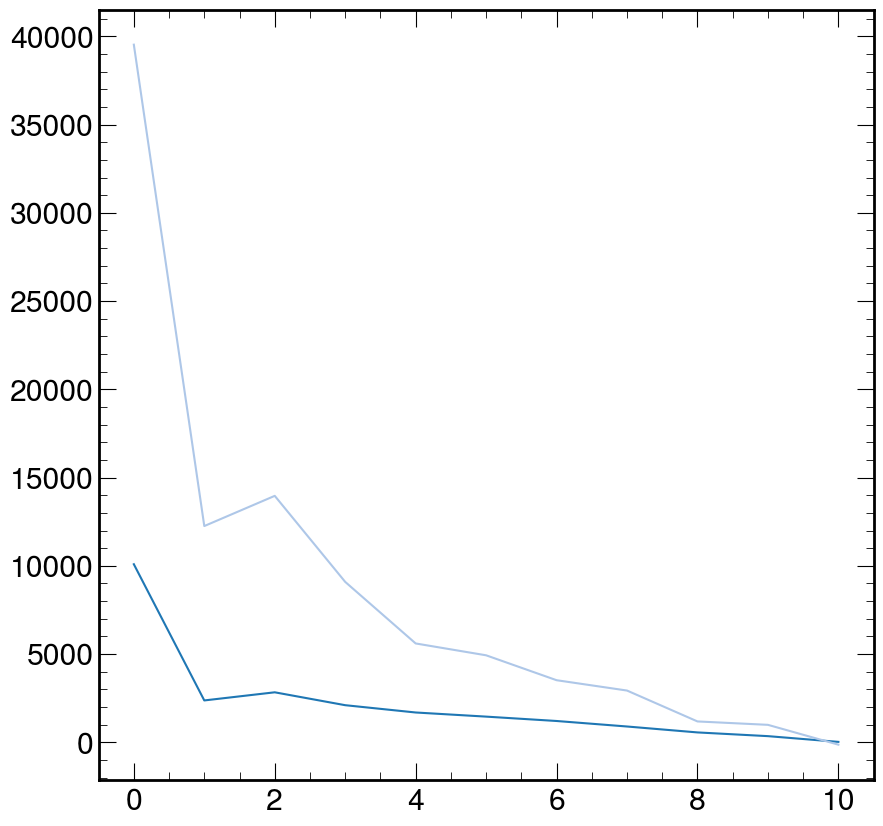

In [553]:
plt.plot(output_pythia[2])
plt.plot(output_herwig[2])

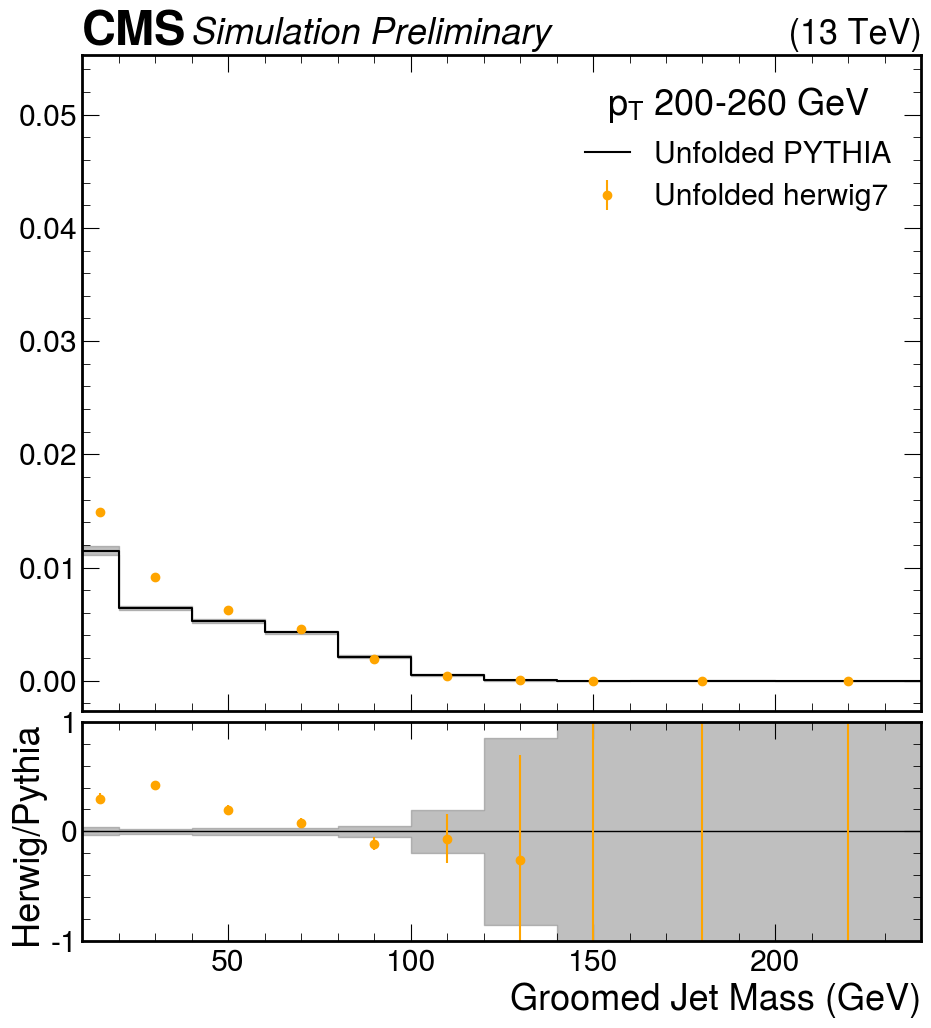

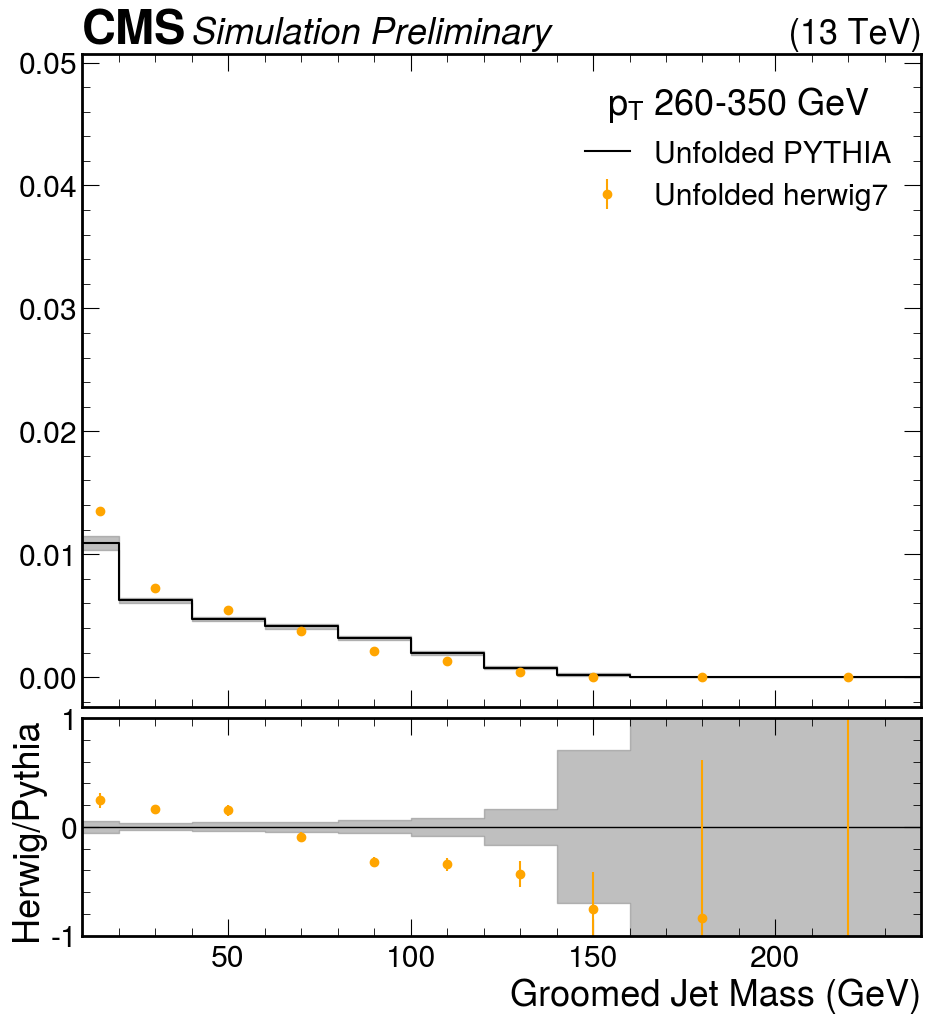

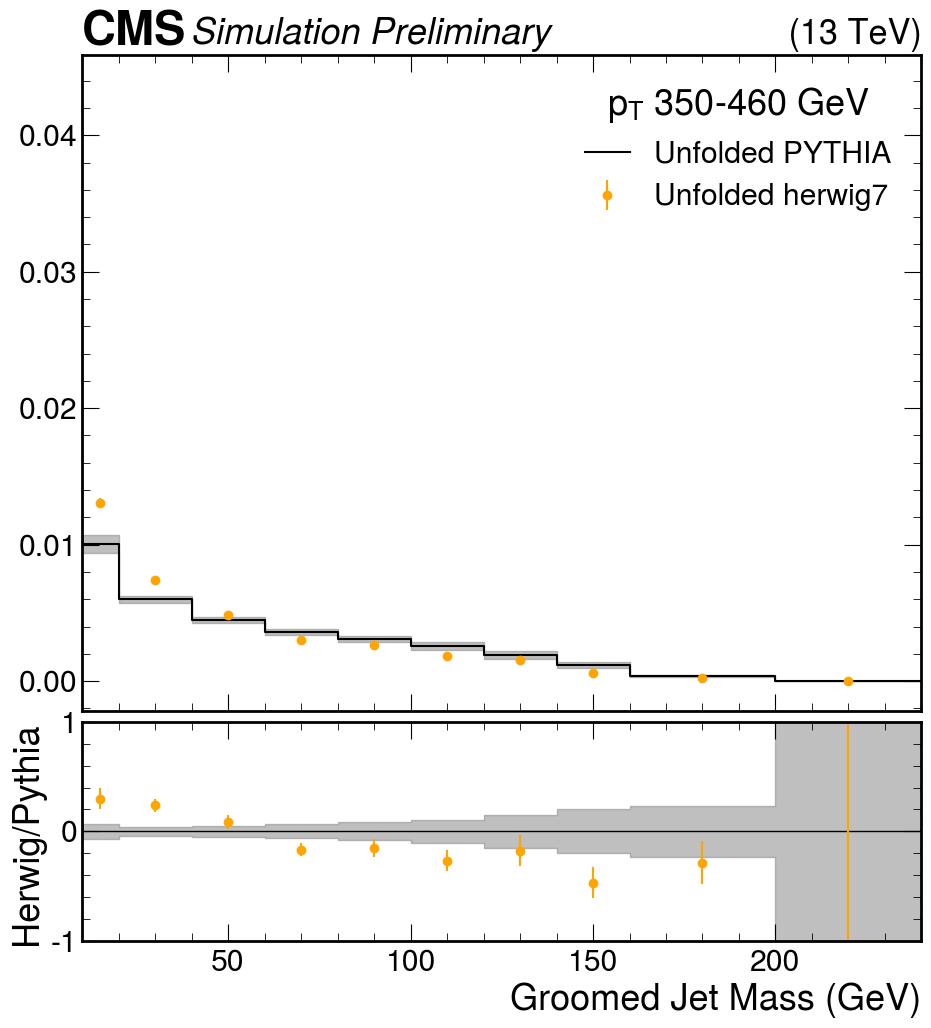

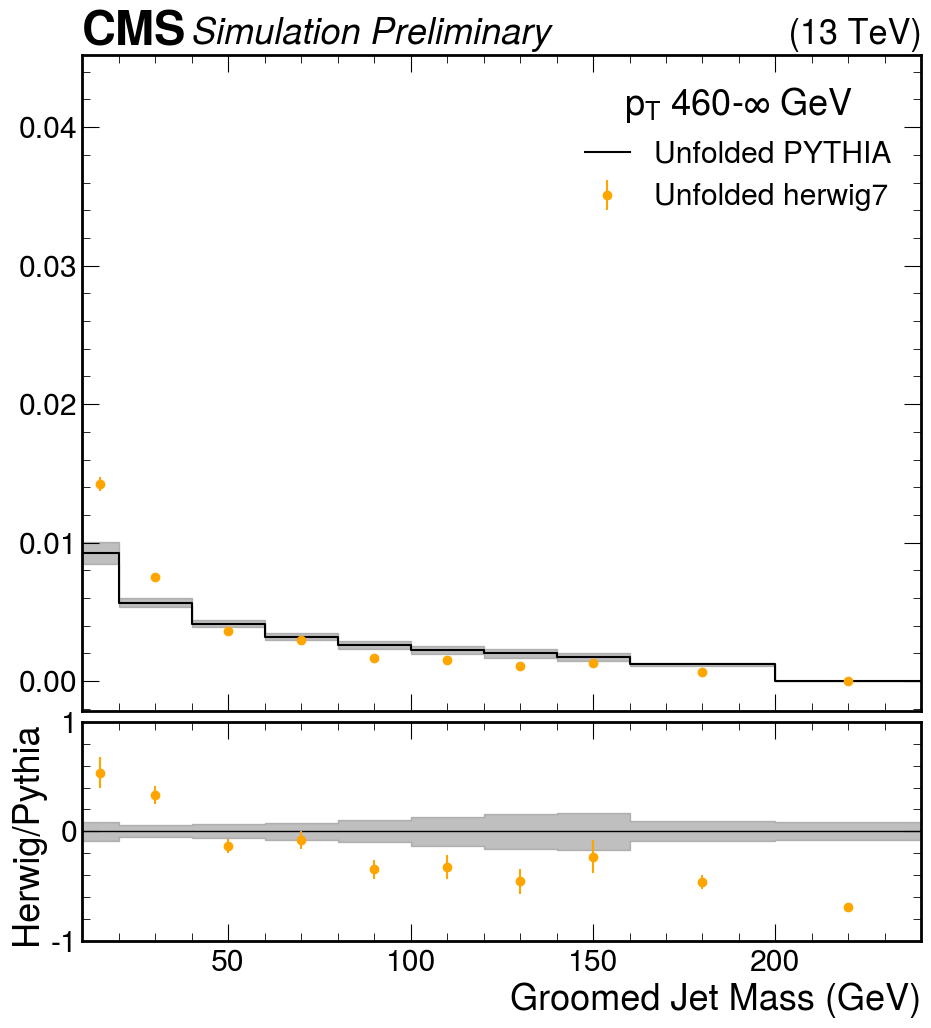

In [555]:
mgen_edge_mod = mgen_edge.copy()
mgen_edge_mod[-1] = 240
title_list = [ r"$p_T$ 200-260 GeV",  r"$p_T$ 260-350 GeV",  r"$p_T$ 350-460 GeV",  r"$p_T$ 460-$\infty$ GeV"]

for i in range(4):
    fig, (ax1, ax2) = make_comparison_plot(
            output_pythia[i]/mgen_width/output_pythia[i].sum(), unc_pythia[i]/mgen_width/output_pythia[i].sum(),
            output_herwig[i]/mgen_width/output_herwig[i].sum(), unc_herwig[i]/mgen_width/output_herwig[i].sum(),
            mgen_edge_mod
        )
    
    ax2.set_ylim(-1, 1)
    ax1.set_xlim(10,240)
    ax1.legend(title = title_list[i])
    if groomed:
        ax2.set_xlabel("Groomed Jet Mass (GeV)")

    else:
        ax2.set_xlabel("Ungroomed Jet Mass (GeV)")
    ax2.set_ylabel("Herwig/Pythia")
    hep.cms.label("Preliminary", ax = ax1)
